## Plots for the paper and appendix

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = 9, 16
mpl.rc('pdf', fonttype=42)
import json
import numpy as np
sns.set(font_scale=1.2, style='ticks')

In [2]:
clean_model_names = {
    "GatedNodeGatEncoder": "GAT",
    "GatedGatEncoder": "E-GAT",
    "RepresentationGCNEncoder": "GCN",
    "CompositionRGCNEncoder": "RGCN",
    "Param": "Param",
}
clean_world_names = json.load(open('../plots/difficulty_dict.json'))

In [3]:
light_colors = [sns.color_palette("pastel")[0],sns.color_palette("pastel")[1]]
dark_colors = [sns.color_palette("muted")[0],sns.color_palette("muted")[1]]

## Supervised

In [5]:
df = pd.read_csv('raw_data/supervised_result_complete.csv')

In [6]:
df['rep_fn'] = df.model_representation_fn_path.apply(lambda x: x.split('.')[-1])
df['comp_fn'] = df.model_composition_fn_path.apply(lambda x: x.split('.')[-1])
df.rep_fn = df.rep_fn.apply(lambda x: clean_model_names[x])
df.comp_fn = df.comp_fn.apply(lambda x: clean_model_names[x])

In [7]:
df = df[df.general_train_rule.isin(clean_world_names.keys())]

In [8]:
df.general_train_rule = df.general_train_rule.apply(lambda x: clean_world_names[x])

In [11]:
model = []
for i,row in df.iterrows():
    model.append(row['rep_fn'] + "-" + row['comp_fn'])
df['model'] = model

In [8]:
model_order = ["GAT-E-GAT","GCN-E-GAT","Param-E-GAT","GAT-RGCN","GCN-RGCN","Param-RGCN"]

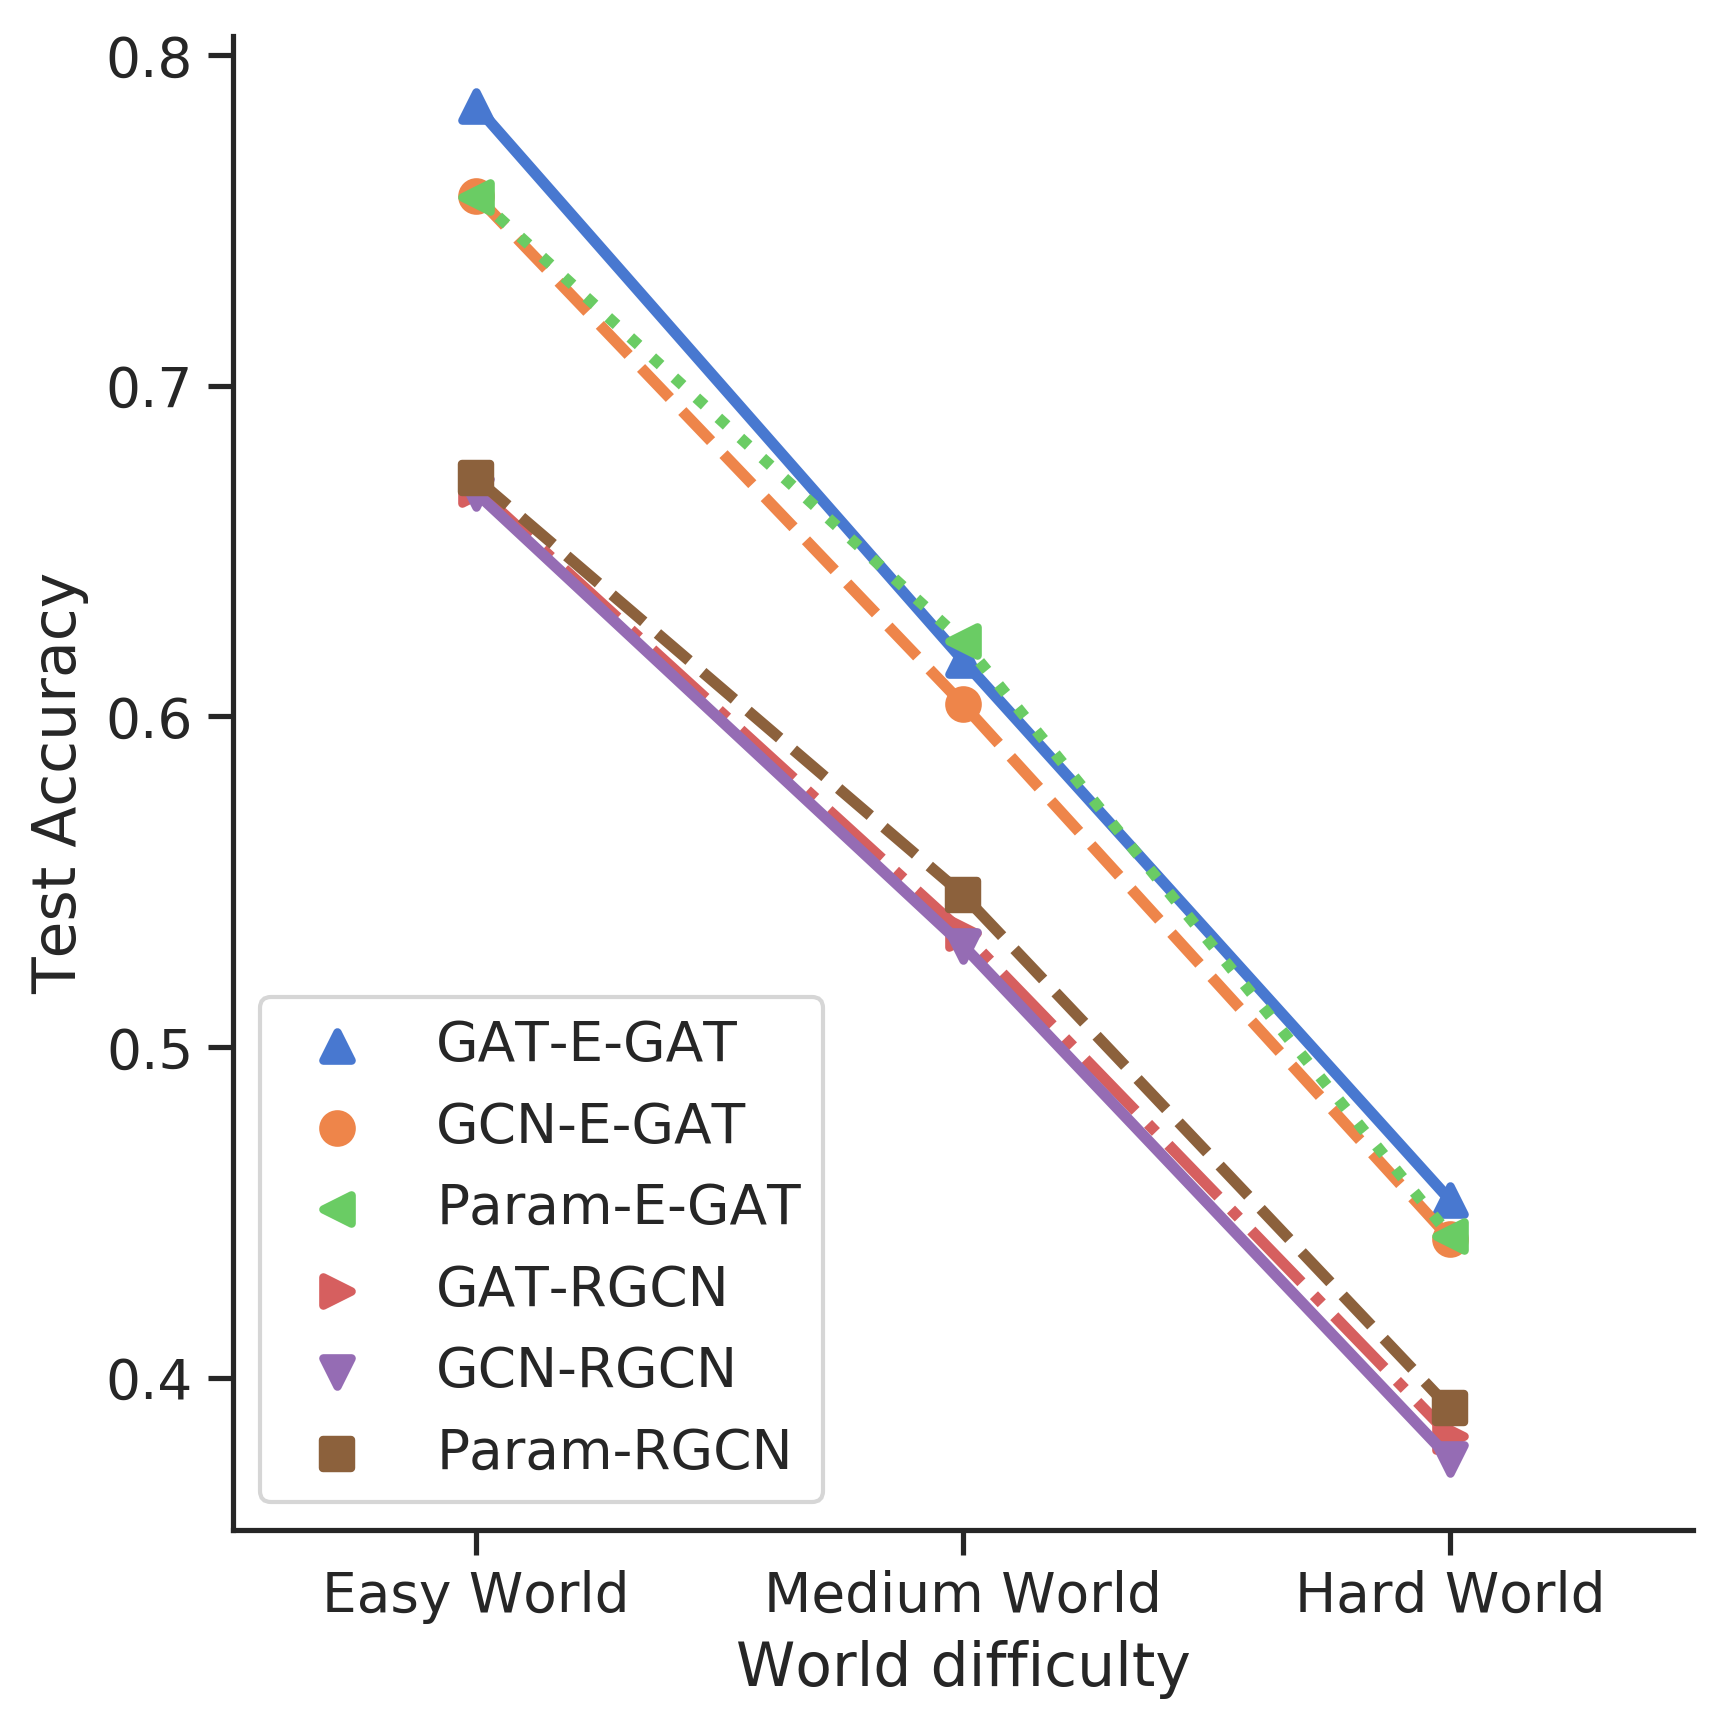

In [17]:
g = sns.catplot(y="train_test_accuracy", x="general_train_rule", hue="model", data=df.sort_values("train_test_accuracy",ascending=False),
                hue_order=model_order,
                height=6, kind="point", palette="muted",legend=False, markers=["^", "o","<",">","v",","], 
                linestyles=["-", "--", ":","-.",'-','--'],ci=None,
)
# sns.catplot(y="train_test_accuracy", x="general_train_rule", hue="model", data=df.sort_values("train_test_accuracy",ascending=False),
#                 height=6, kind="point", palette="muted",legend=False, markers=["^", "o","<",">","v",","], 
#                 linestyles=["-", "--", ":","-.",'-','--'],g=g,
# )
#g.despine(left=True)
plt.legend(loc="lower left")
g.set_ylabels("Test Accuracy")
g.set_xlabels("World difficulty")
g.savefig("../plots/supervised_all.pdf")

## Multitask Similarity

In [18]:
df_dis = pd.read_csv('clean_data/multitask_logic_sim_dis_eval_conv.csv')
model = []
for i,row in df_dis.iterrows():
    model.append(row['rep_fn'] + "-" + row['comp_fn'])
df_dis['model'] = model
df_dis['rule_sp_label'] = df_dis.rule_sp.apply(lambda x: "perc_" + str(round(float(x),2)))
df_dis = df_dis[df_dis.rule_sp_label != 'perc_0.5']

In [19]:
df_split = df_dis.copy()
df_split['acc_type'] = 'Zero'
df_b = df_split.copy()
df_b.accuracy = df_b.k_conv
df_b.acc_type = 'Convergence'
df_zc = pd.concat([df_split, df_b])
df_zc.rule_sp_label = df_zc.rule_sp_label.apply(lambda x: "100%" if x == "perc_1.0" else "0%")

In [20]:
df_zc.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1',
       'acc_std', 'accuracy', 'comp_fn', 'epoch', 'k', 'loss', 'minibatch',
       'mode', 'rep_fn', 'rule_world', 'test_rule', 'top_mode', 'updates',
       'rule_sp', 'baseline', 'recovery', 'k_conv', 'recovery_conv', 'model',
       'rule_sp_label', 'acc_type'],
      dtype='object')

In [21]:
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="bar", ax=ax, **kwargs)

/private/home/koustuvs/miniconda3/envs/lgw/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/private/home/koustuvs/miniconda3/envs/lgw/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


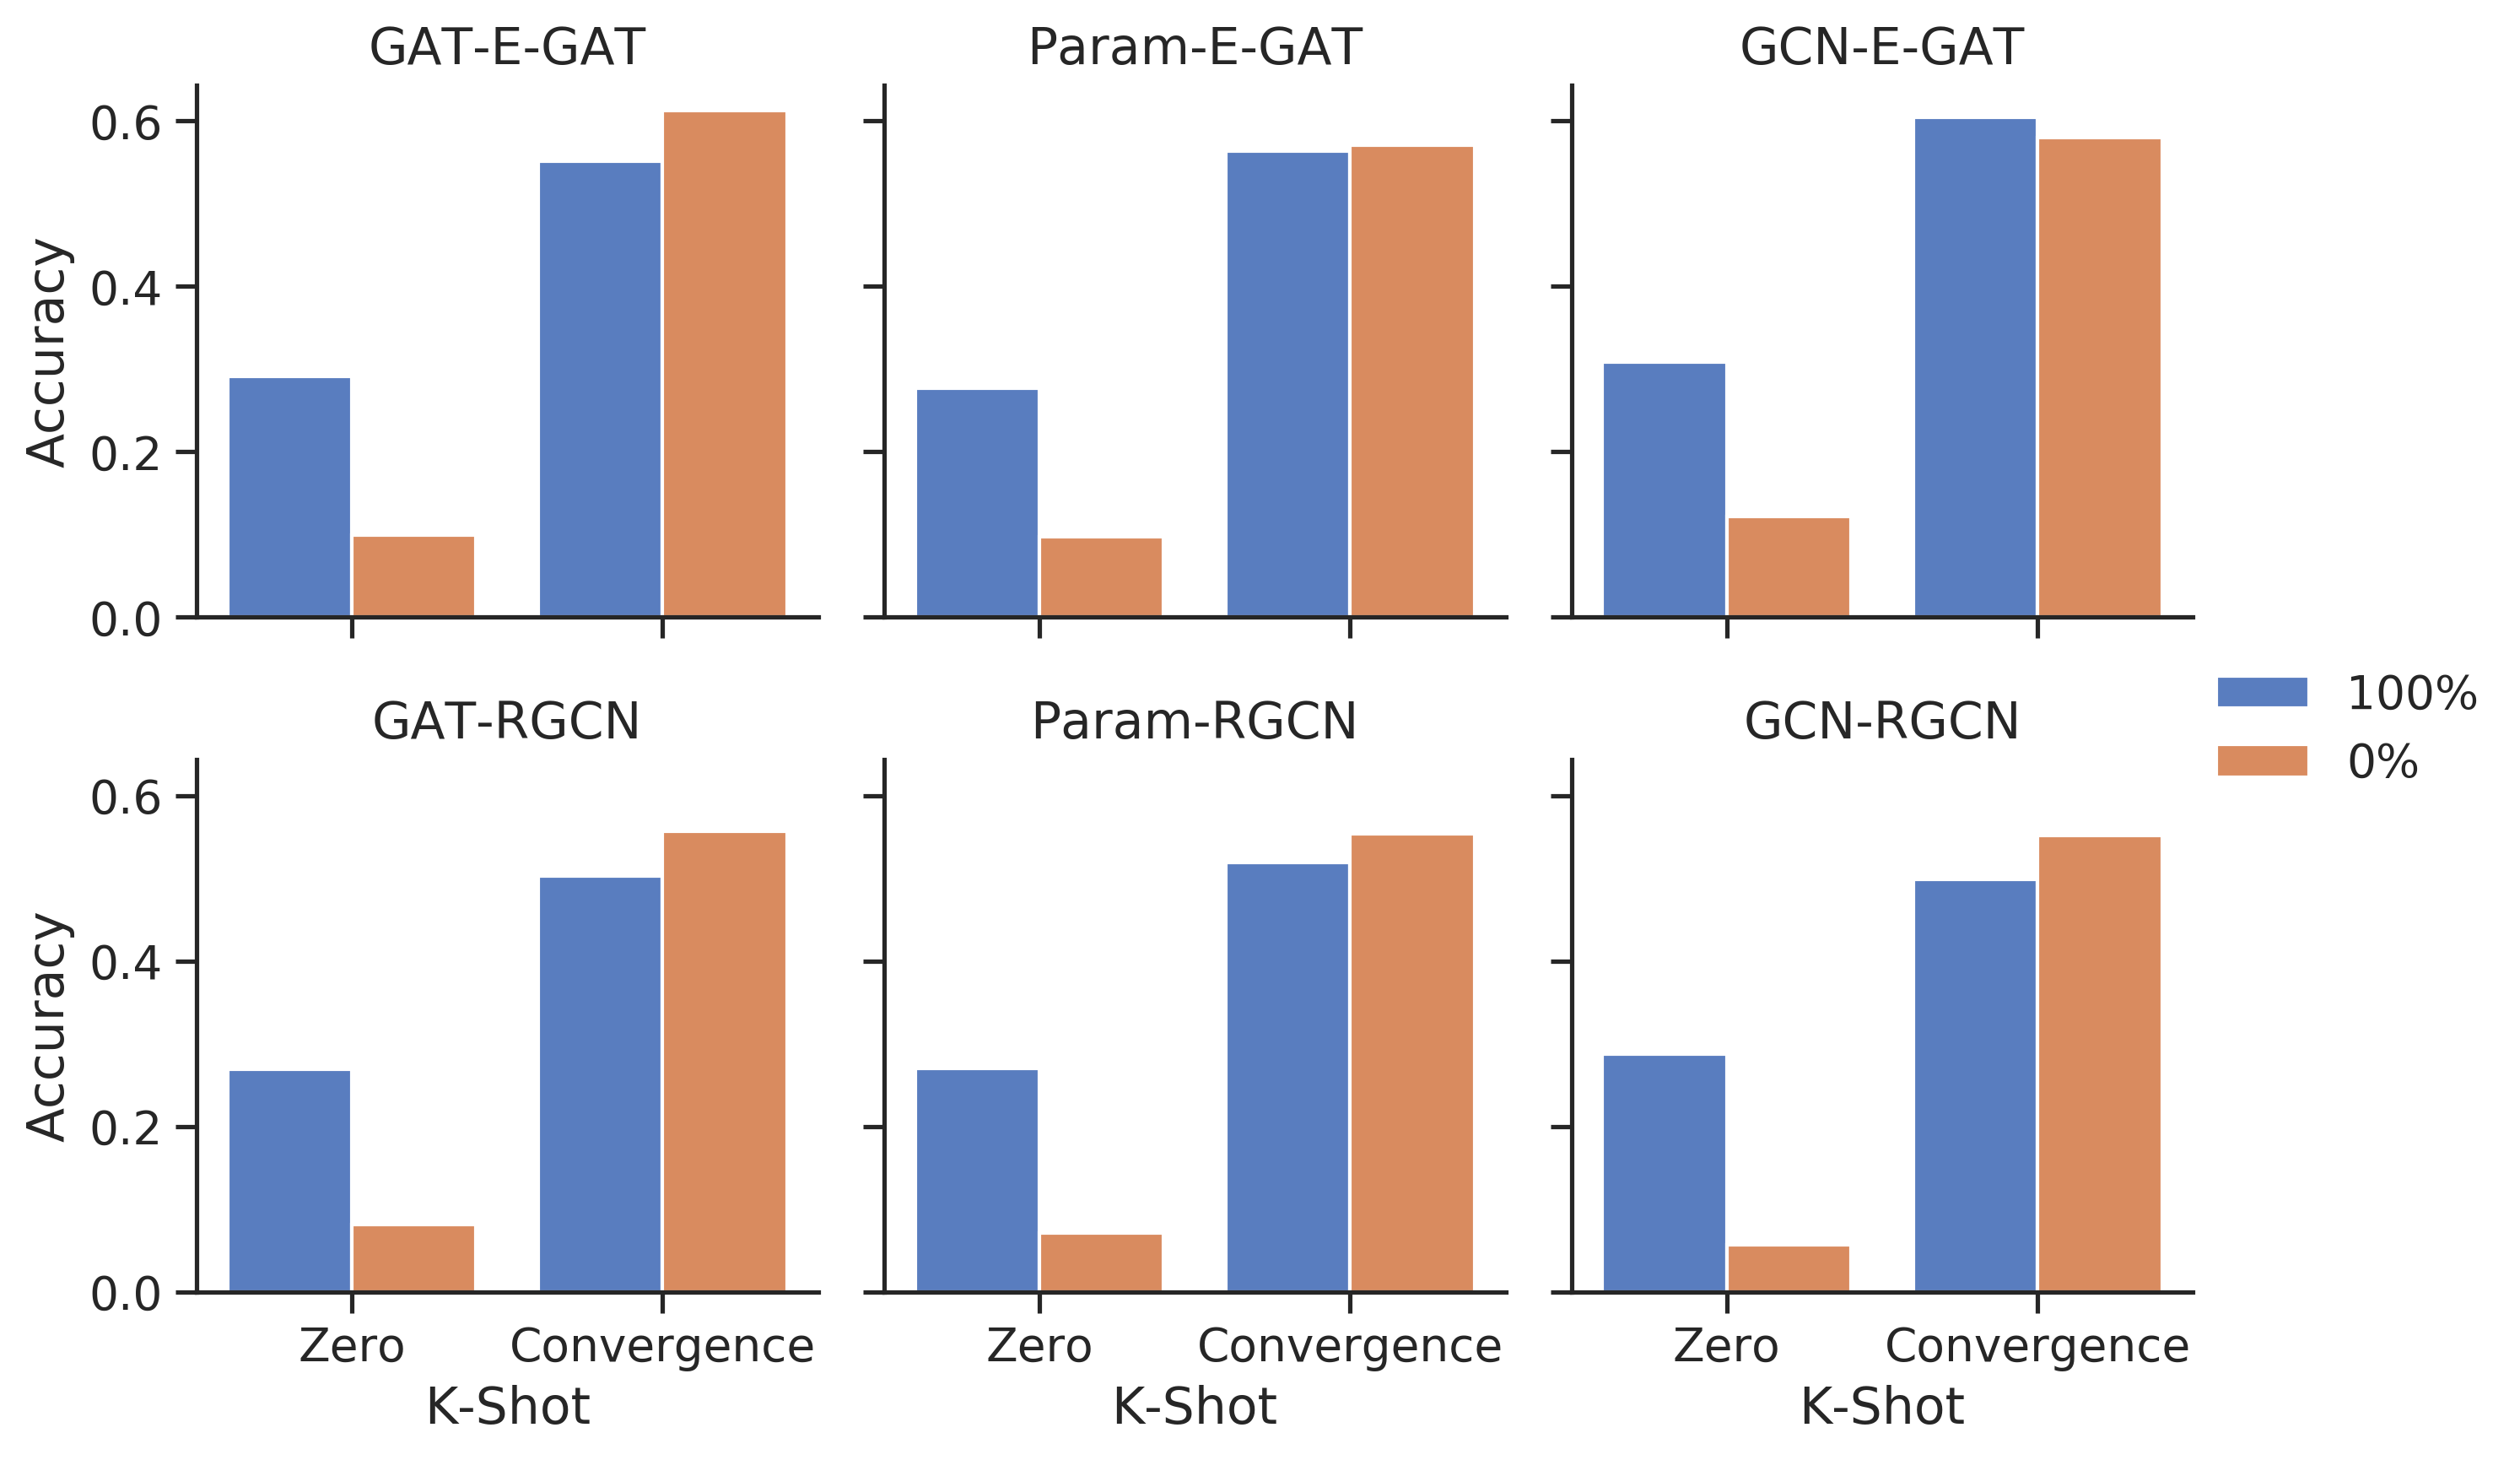

In [26]:
g = sns.FacetGrid(df_zc, col="model", col_wrap=3)
g.map(sns.barplot, 'acc_type', 'accuracy', "rule_sp_label", palette=dark_colors,ci="acc_std")
x = [plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.add_legend()
g.set_ylabels("Accuracy")
g.set_xlabels("K-Shot")
g.savefig("../plots/multitask_sim_dis_renew.pdf")

## Continual learning

In [27]:
df = pd.read_csv('raw_data/multitask_logic_seq_eval_results.csv')

In [28]:
df_comp = pd.read_csv('raw_data/multitask_comp_seq_eval_results.csv')

In [29]:
df_rep = pd.read_csv('raw_data/multitask_rep_seq_eval_results.csv')

In [30]:
model = []
for i,row in df.iterrows():
    model.append(row['rep_fn'] + "-" + row['comp_fn'])
df['model'] = model

In [31]:
df['current_world_id'] = df.current_world.apply(lambda x: int(x.split('_')[-1]))

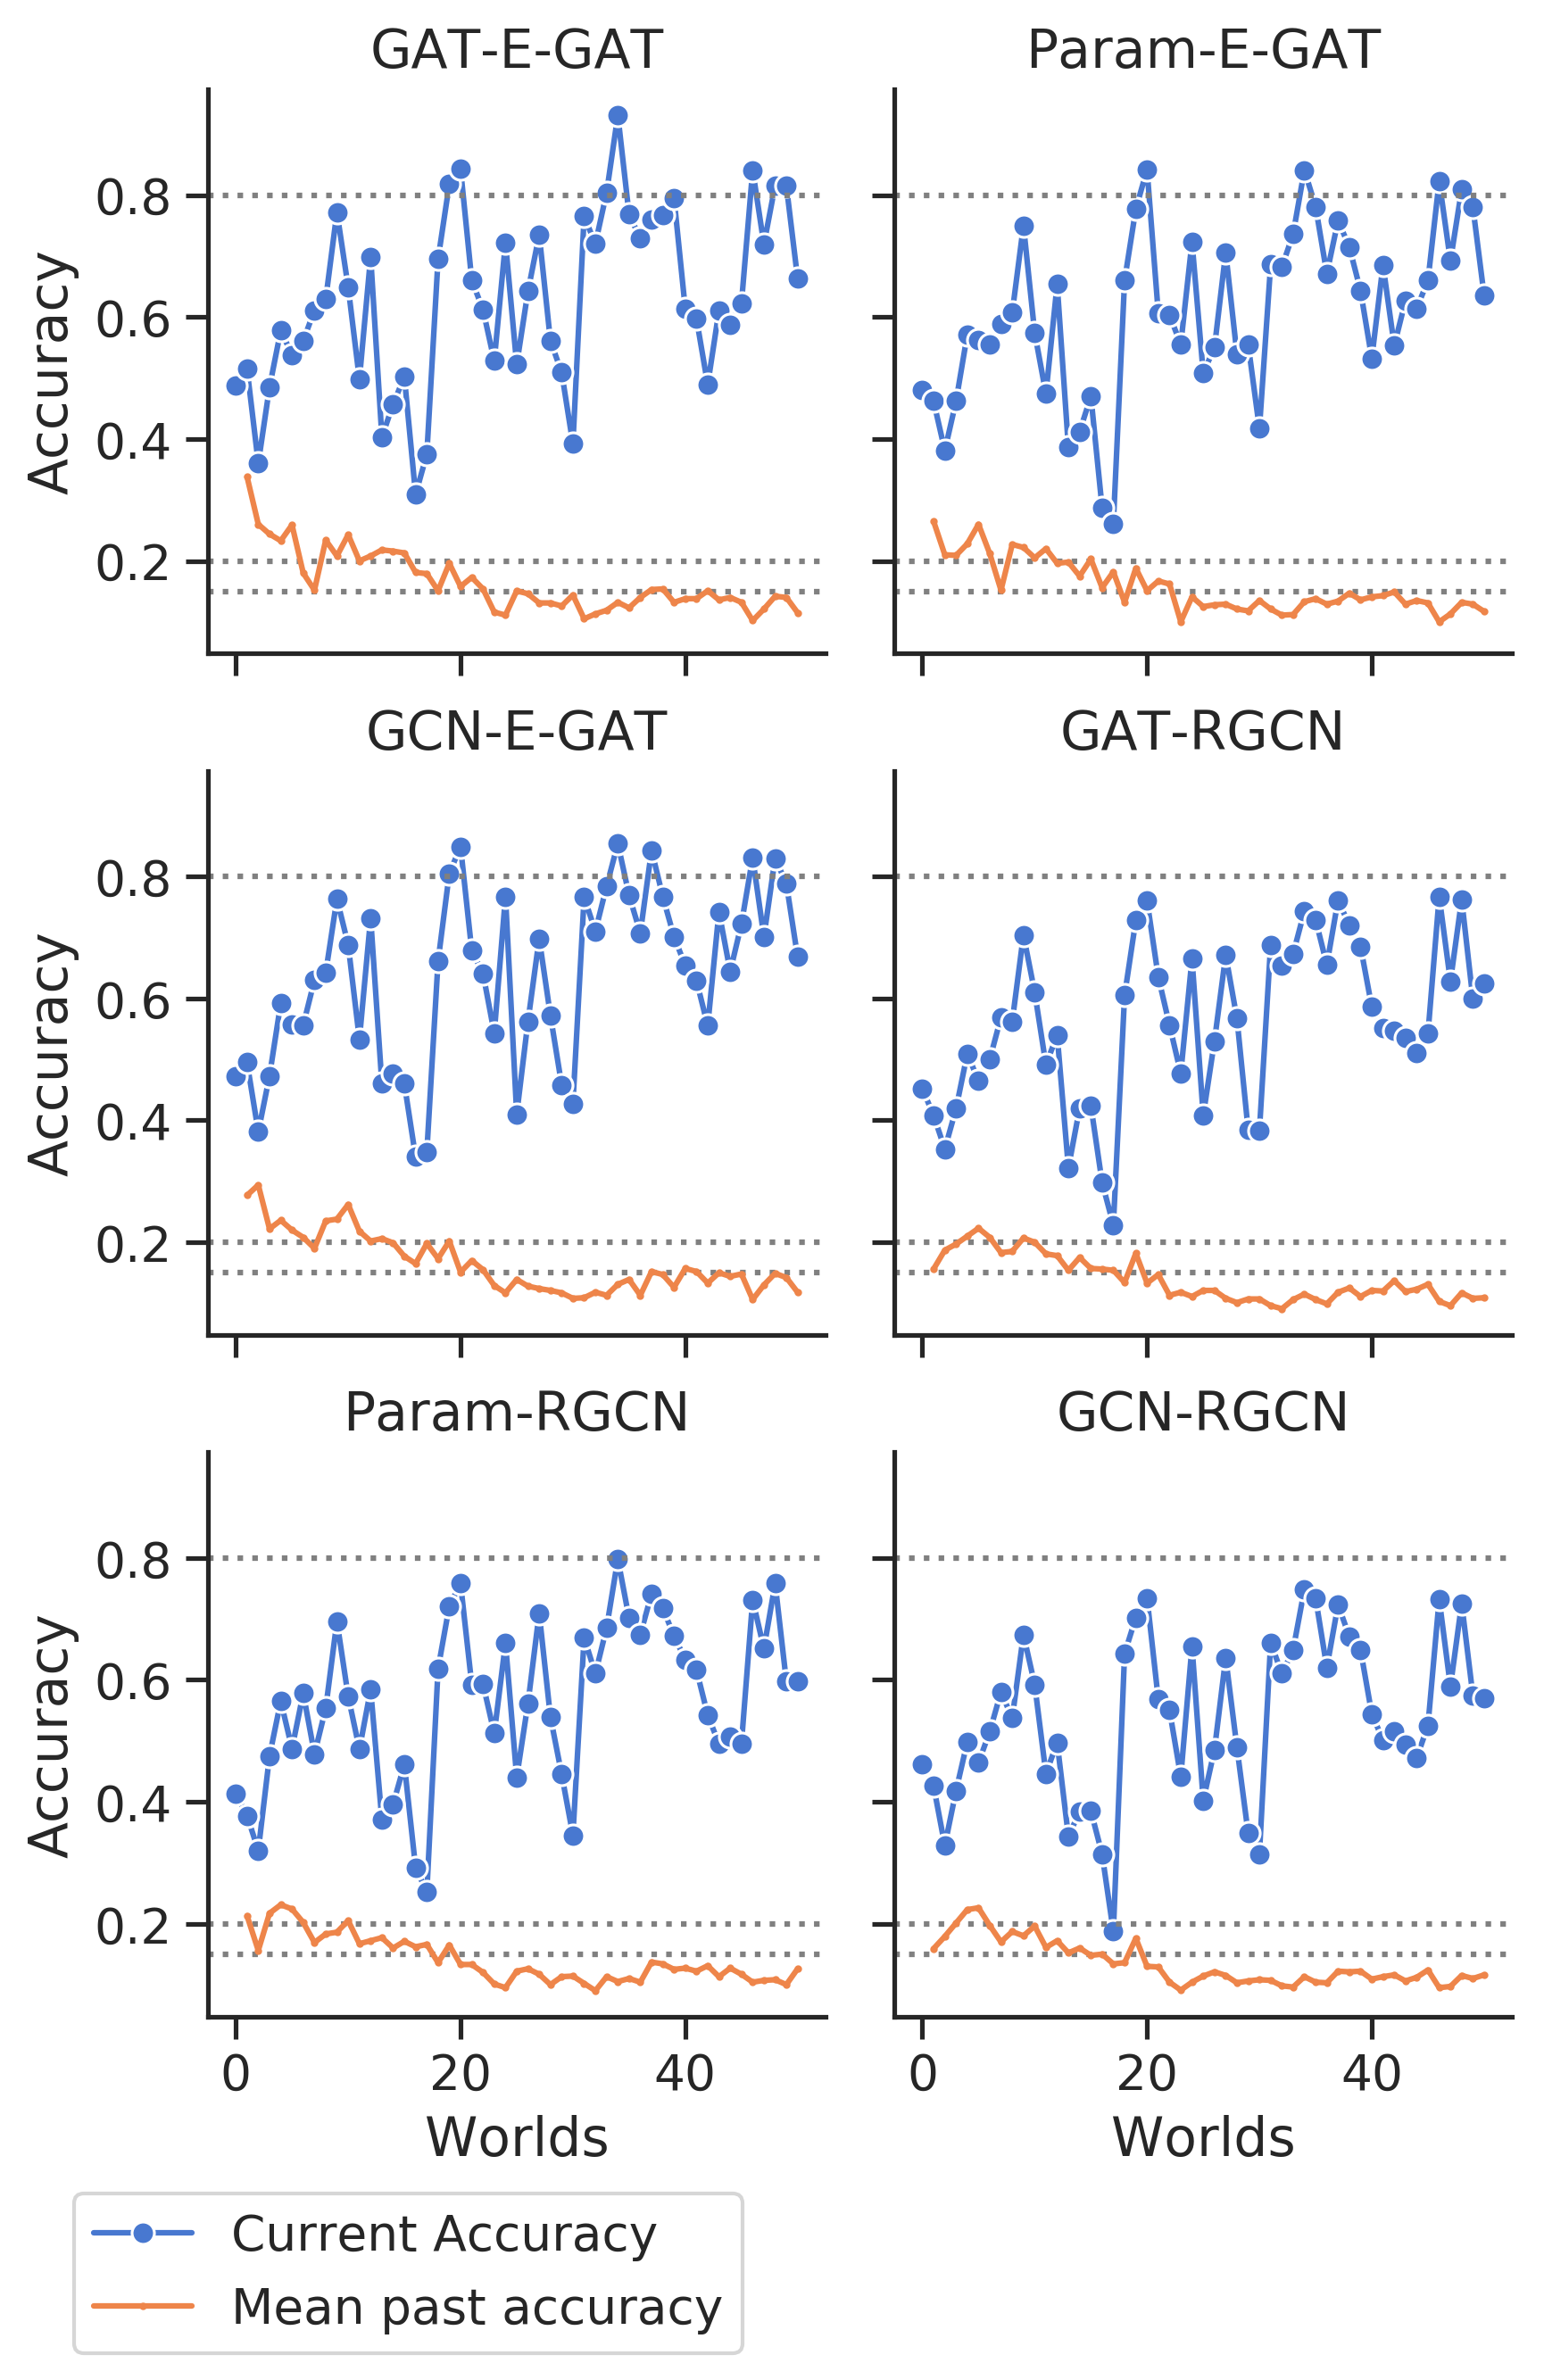

In [33]:
g = sns.FacetGrid(df, col="model", col_wrap=2, hue_order=model_order)
g.map(sns.lineplot, 'current_world_id', 'accuracy', marker='o', color=dark_colors[0], label="Current Accuracy")
g.map(plt.axhline, y=.8, ls=":", c=".5")
g.map(plt.axhline, y=.2, ls=":", c=".5")
g.map(plt.axhline, y=.15, ls=":", c=".5")
g.map(plt.plot, 'current_world_id', 'past_accuracy', marker='o', color=dark_colors[1], markersize=1, label="Mean past accuracy")
x = [plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_ylabels("Accuracy")
g.set_xlabels("Worlds")
plt.legend(bbox_to_anchor=(0.05,0), loc="lower left",bbox_transform=g.fig.transFigure, ncol=1)
plt.subplots_adjust(bottom=0.15)
g.savefig("../plots/continual.pdf")

In [34]:
df['past_acc_comp'] = df_comp['past_accuracy']

In [35]:
df['past_acc_rep'] = df_rep['past_accuracy']

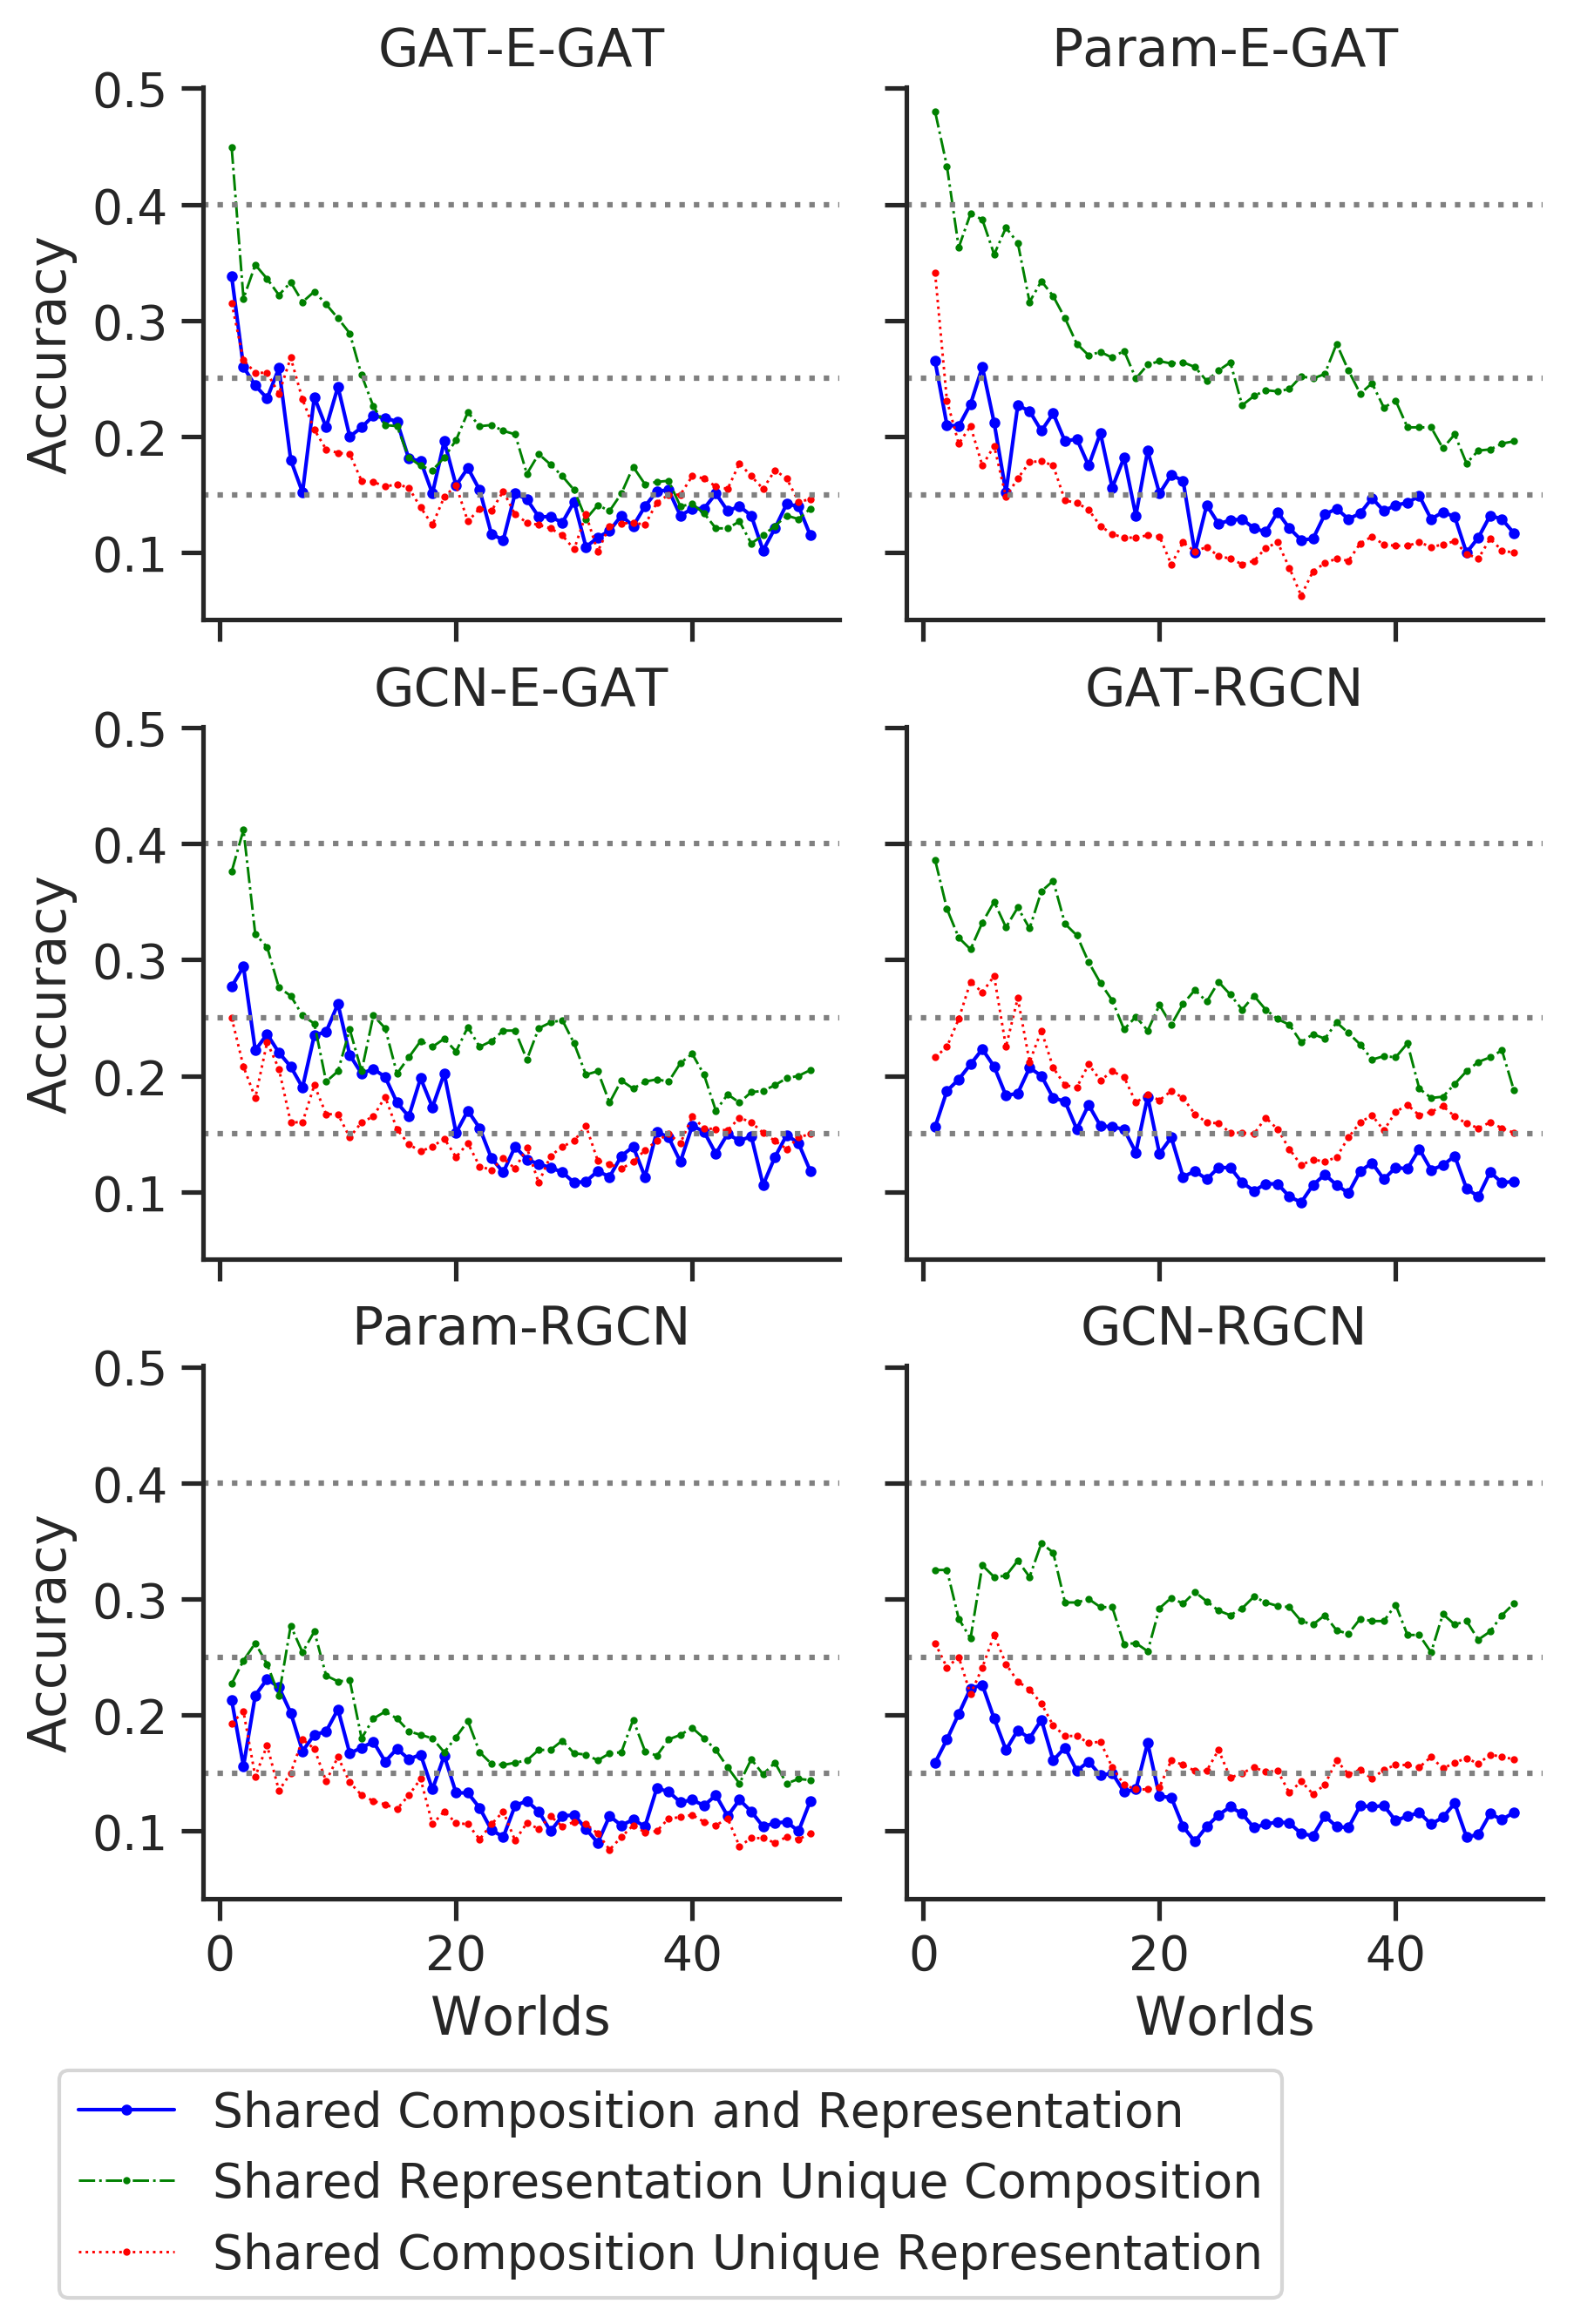

In [36]:
g = sns.FacetGrid(df, col="model", col_wrap=2, margin_titles=True)
#g.map(sns.lineplot, 'current_world_id', 'accuracy', marker='o')
# g.map(plt.axhline, y=.8, ls=":", c=".5")
# g.map(plt.axhline, y=.2, ls=":", c=".5")
# g.map(plt.axhline, y=.15, ls=":", c=".5")
g.map(plt.plot, 'current_world_id', 'past_accuracy', marker='o', linewidth=1, markersize=2, color="blue",label="Shared Composition and Representation")
g.map(plt.plot, 'current_world_id', 'past_acc_comp', marker='.', linewidth=0.7, markersize=2, linestyle="-.", color="green", label="Shared Representation Unique Composition")
g.map(plt.plot, 'current_world_id', 'past_acc_rep', marker='.', linewidth=0.7, markersize=2, linestyle=":", color="red", label="Shared Composition Unique Representation")
g.map(plt.axhline, y=.4, ls=":", c=".5")
g.map(plt.axhline, y=.25, ls=":", c=".5")
g.map(plt.axhline, y=.15, ls=":", c=".5")
x = [plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_ylabels("Accuracy")
g.set_xlabels("Worlds")
#g.add_legend(loc="lower left")
plt.legend(bbox_to_anchor=(0.0,0), loc="lower left",bbox_transform=g.fig.transFigure, ncol=1)
plt.subplots_adjust(bottom=0.18)
g.savefig("../plots/continual_all.pdf")

### Multitask Adaptation

In [37]:
df = pd.read_csv('clean_data/multitask_sim_all_adapt.csv')

In [38]:
df = df[df.group != 2]
df.group = df.group.apply(lambda x: 0.0 if x == 3 else 1.0)

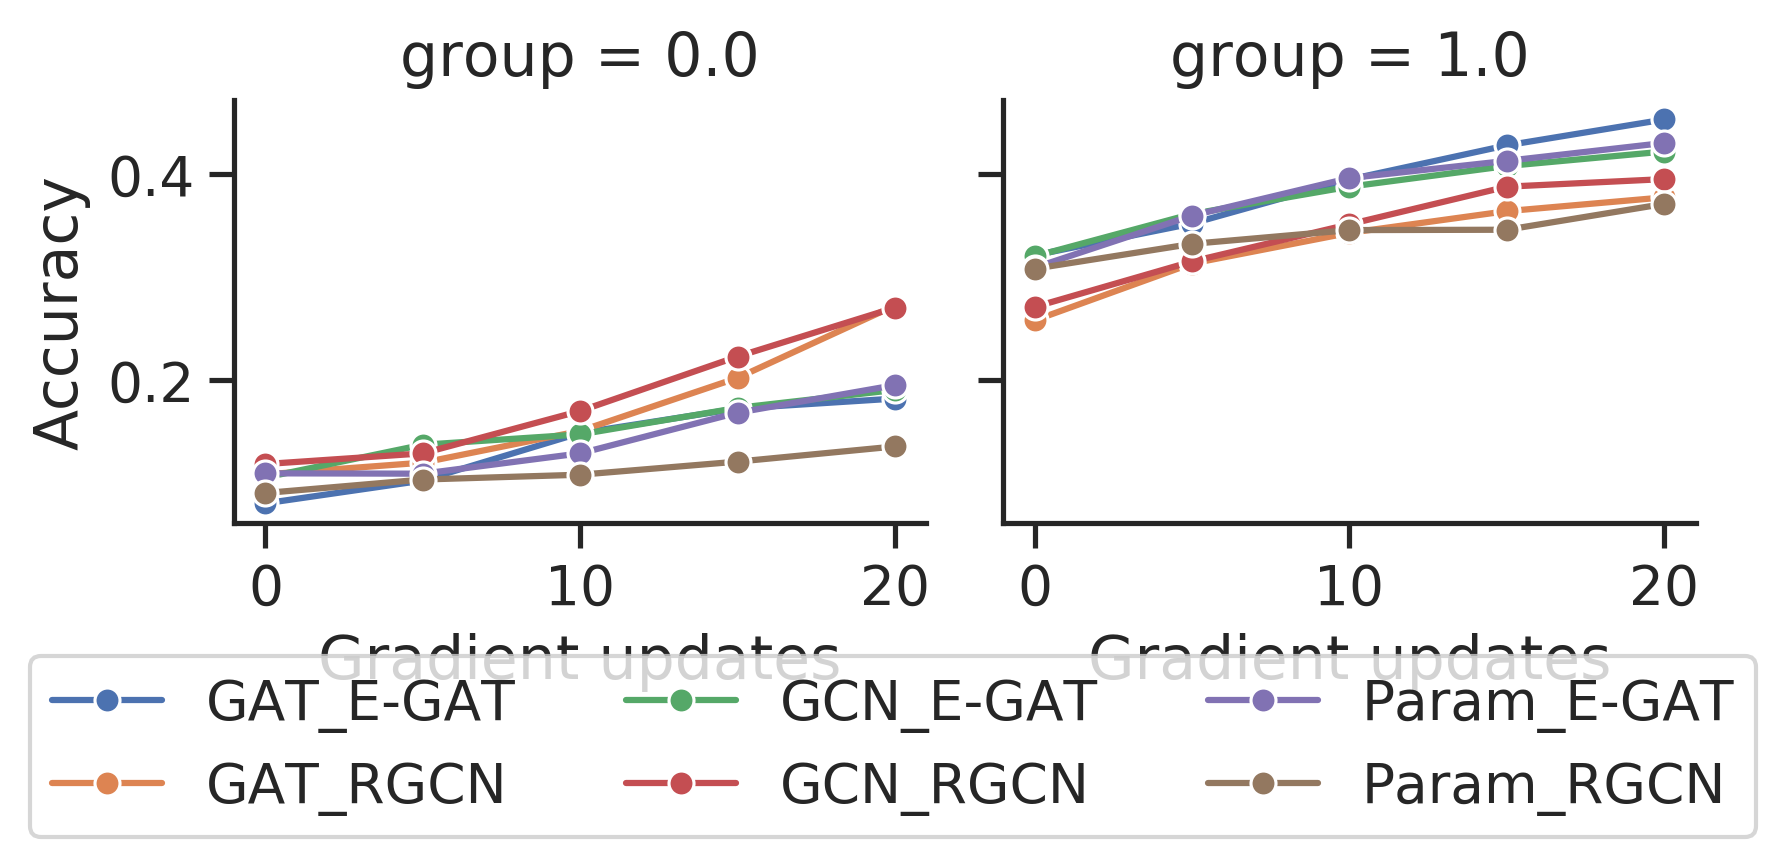

In [40]:
g = sns.FacetGrid(df, col="group", hue='model', col_wrap=2)
g.map(sns.lineplot, 'k', 'accuracy', marker='o')
g.set_ylabels("Accuracy")
g.set_xlabels("Gradient updates")
#g.add_legend()
plt.legend(bbox_to_anchor=(0.02,0), loc="lower left",bbox_transform=g.fig.transFigure, ncol=3)
plt.subplots_adjust(bottom=0.38)
g.savefig("../plots/multitask_sim_adapt.pdf")

## Multitask Inductive - Increasing number of tasks

In [41]:
df_10 = pd.read_csv('clean_data/multitask_task_10_k0eval_results.csv')
df_20 = pd.read_csv('clean_data/multitask_task_20_k0eval_results.csv')
df_30 = pd.read_csv('clean_data/multitask_task_30_k0eval_results.csv')
df_40 = pd.read_csv('clean_data/multitask_task_40_k0eval_results.csv')
df_50 = pd.read_csv('clean_data/multitask_task_50_k0eval_results.csv')

In [42]:
df_10['num_data'] = 10
df_20['num_data'] = 20
df_30['num_data'] = 30
df_40['num_data'] = 40
df_50['num_data'] = 50

In [43]:
df_large = pd.concat([df_10,df_20,df_30,df_40,df_50])

In [44]:
model = []
for i,row in df_large.iterrows():
    model.append(row['rep_fn'] + "-" + row['comp_fn'])
df_large['model'] = model

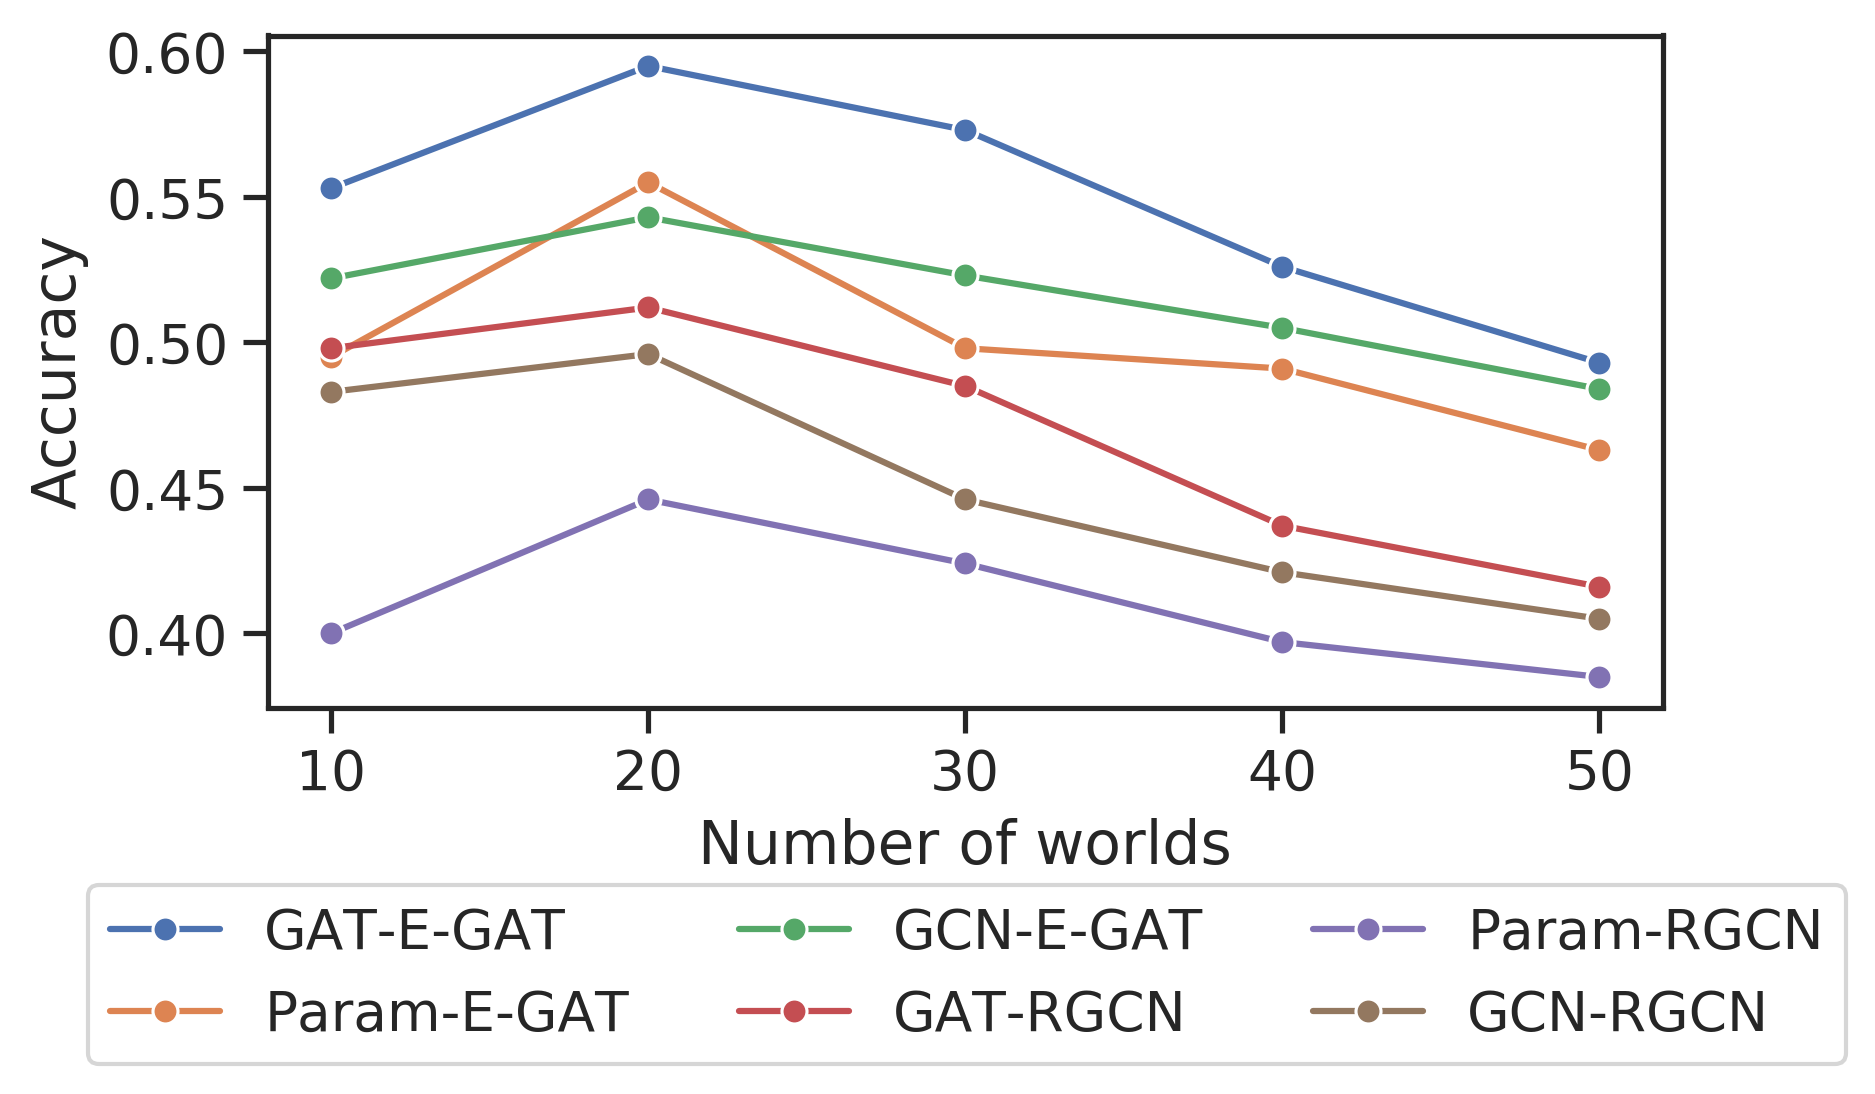

In [55]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="num_data", y="accuracy",
             hue="model",marker='o',
             data=df_large)
#plt.legend(bbox_to_anchor=(0.0,0), loc="lower left",bbox_transform=fig.transFigure, ncol=3)
#plt.subplots_adjust(bottom=0.18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels=labels[1:],bbox_to_anchor=(0.01,0.0), loc="lower left",bbox_transform=fig.transFigure, ncol=3)
plt.ylabel("Accuracy")
plt.xlabel("Number of worlds")
plt.subplots_adjust(bottom=0.32)
plt.savefig("../plots/multitask_10_50.pdf")

In [45]:
## Increasing capacity

In [65]:
df_10 = pd.read_csv('../scripts/multitask_task_large_10_k0eval_results.csv')
df_20 = pd.read_csv('../scripts/multitask_task_large_20_k0eval_results.csv')
df_30 = pd.read_csv('../scripts/multitask_task_large_30_k0eval_results.csv')
df_40 = pd.read_csv('../scripts/multitask_task_large_40_k0eval_results.csv')
df_50 = pd.read_csv('../scripts/multitask_task_large_50_k0eval_results.csv')

In [66]:
df_10['num_data'] = 10
df_20['num_data'] = 20
df_30['num_data'] = 30
df_40['num_data'] = 40
df_50['num_data'] = 50

In [67]:
df_large = pd.concat([df_10,df_20,df_30,df_40,df_50])

In [68]:
model = []
for i,row in df_large.iterrows():
    model.append(row['rep_fn'] + "-" + row['comp_fn'])
df_large['model'] = model

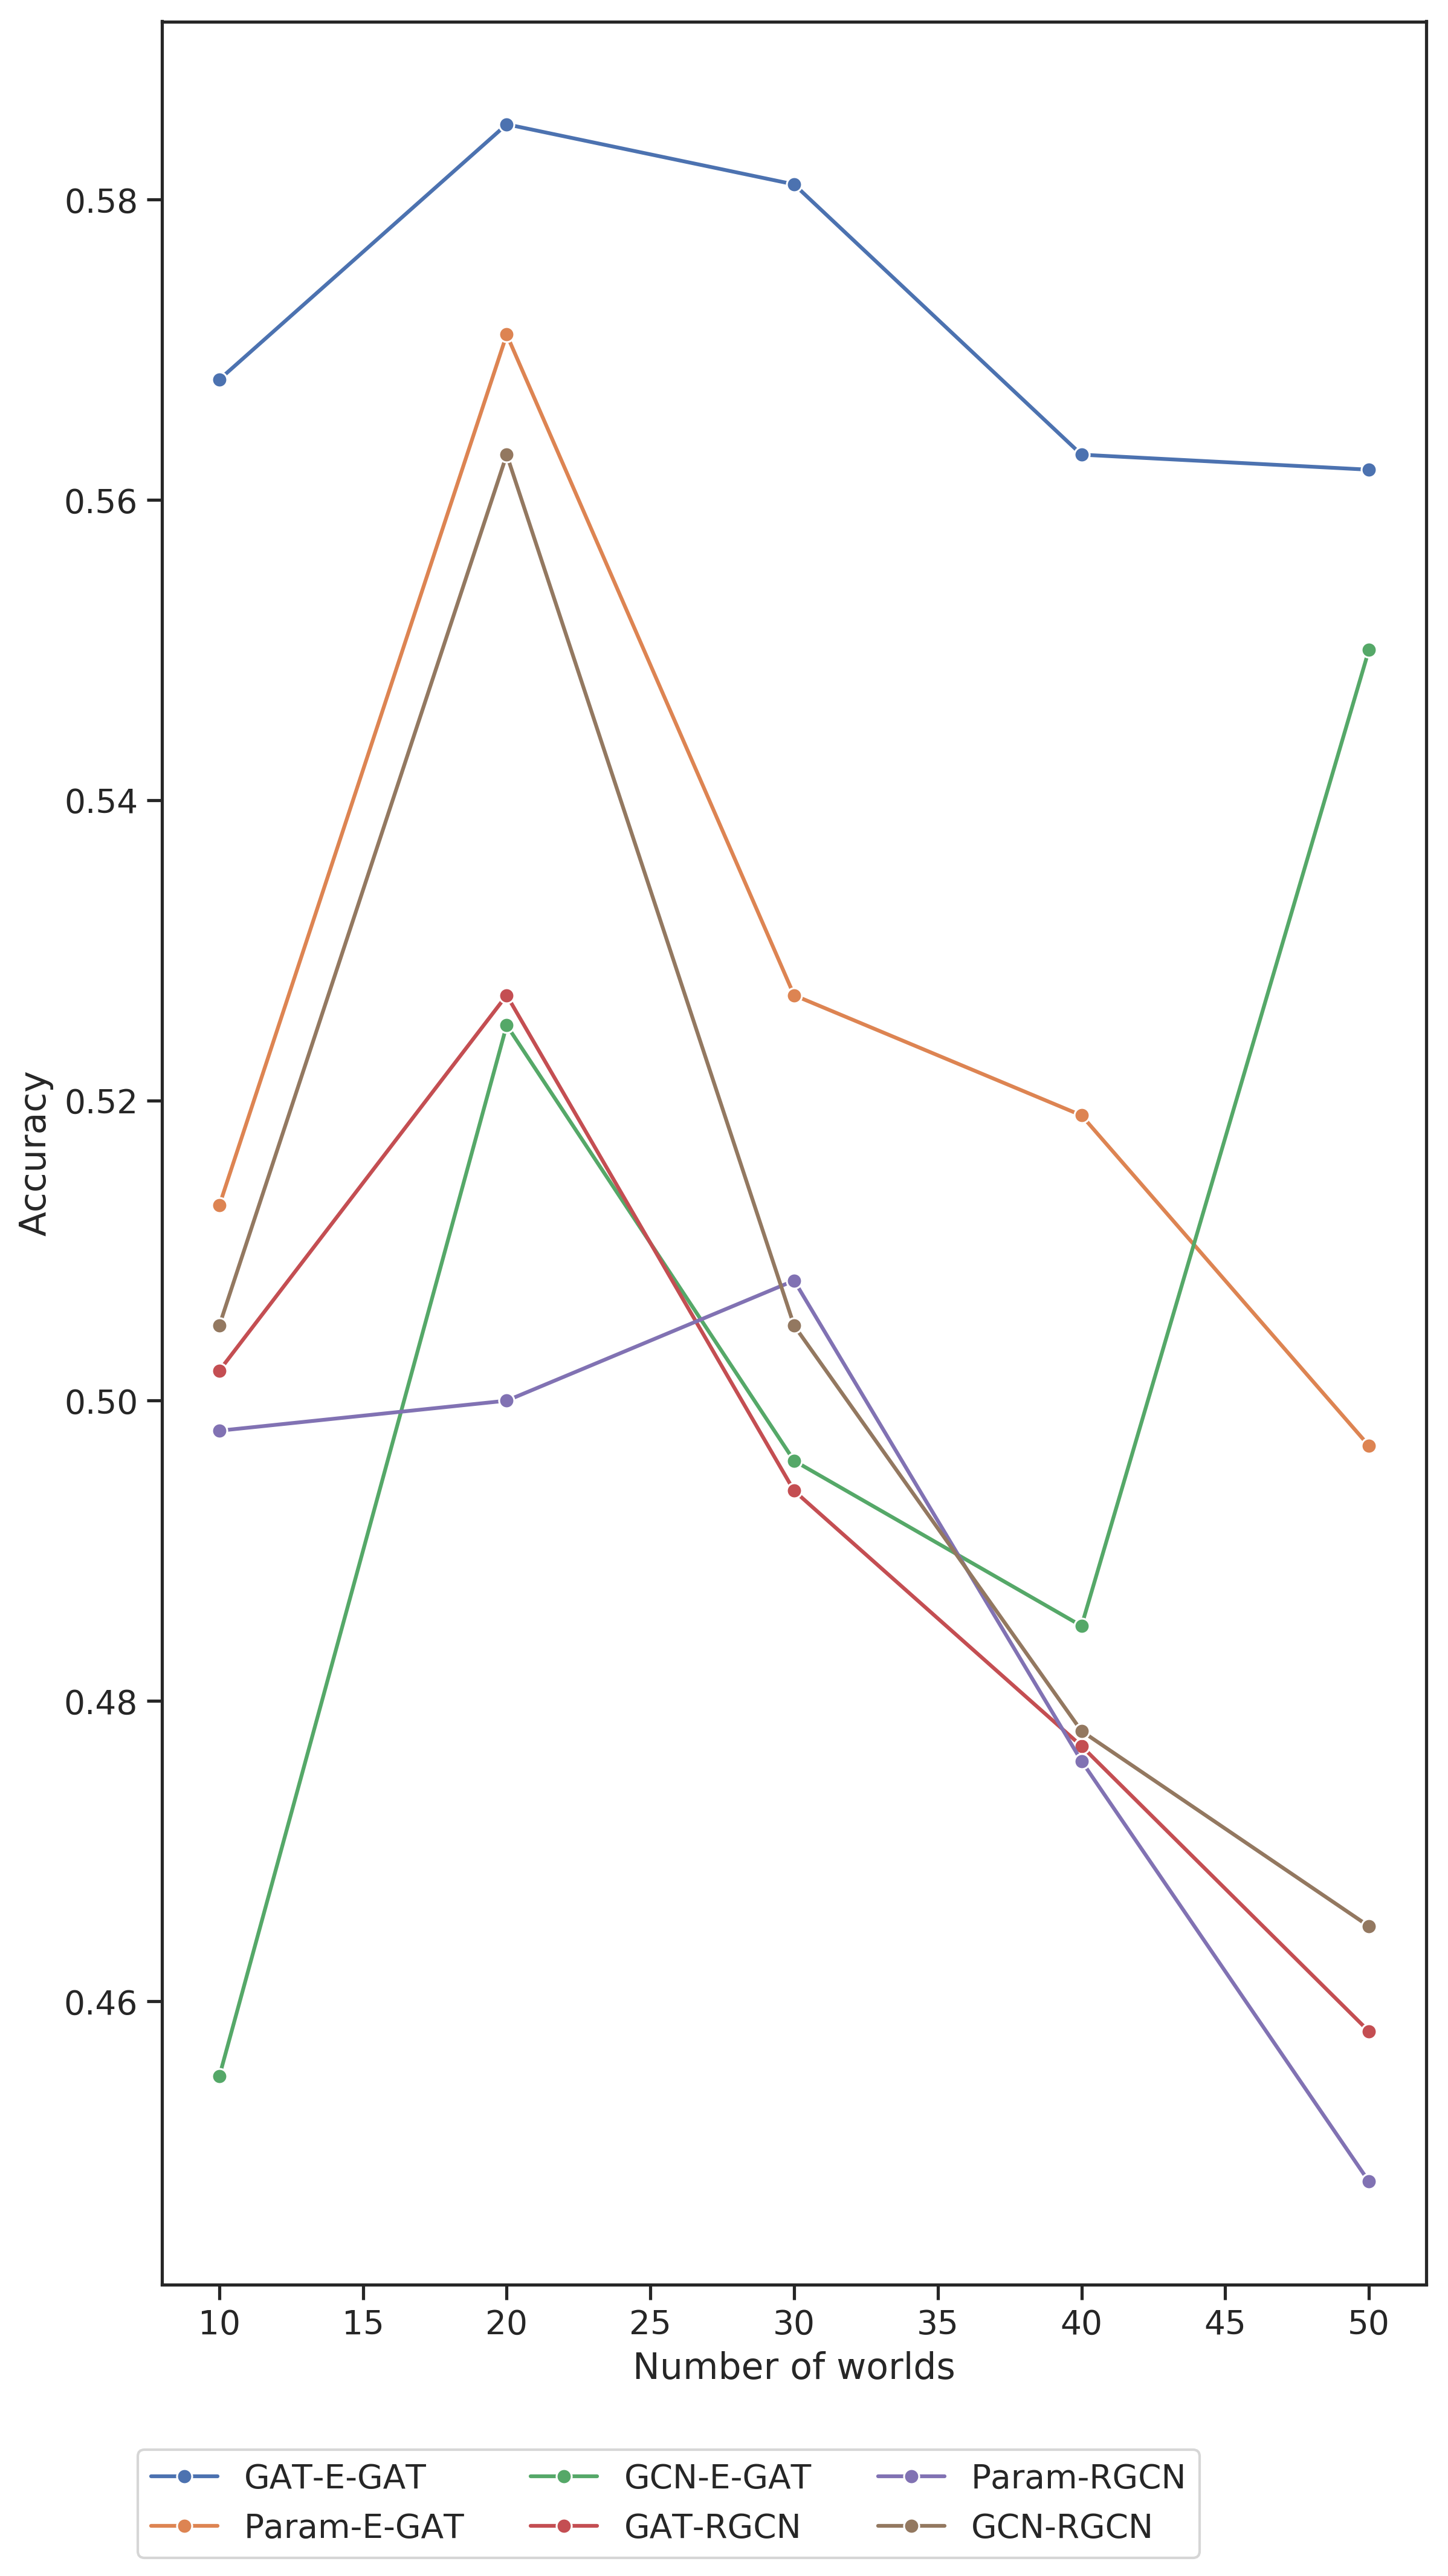

In [73]:
fig, ax = plt.subplots()
ax = sns.lineplot(x="num_data", y="accuracy",
             hue="model",marker='o',
             data=df_large,ci=None)
#plt.legend(bbox_to_anchor=(0.0,0), loc="lower left",bbox_transform=fig.transFigure, ncol=3)
#plt.subplots_adjust(bottom=0.18)
handles, labels = ax.get_legend_handles_labels()
ax.legend(labels=labels[1:],bbox_to_anchor=(0.1,0.0), loc="lower left",bbox_transform=fig.transFigure, ncol=3)
plt.ylabel("Accuracy")
plt.xlabel("Number of worlds")
plt.subplots_adjust(bottom=0.1)
plt.savefig("../plots/multitask_large_10_50.pdf")

## Adaptation Based on Difficulty

In [64]:
ml_diff = []
for i in [0,5,10,15,20,30,40]:
    df_tmp = pd.read_csv('clean_data/novel_k_{}_difficulty.csv'.format(i))
    df_tmp['k'] = i
    ml_diff.append(df_tmp)

In [65]:
ml_diff = pd.concat(ml_diff)
model = []
for i,row in ml_diff.iterrows():
    model.append(row['rep_fn'] + "-" + row['comp_fn'])
ml_diff['model'] = model

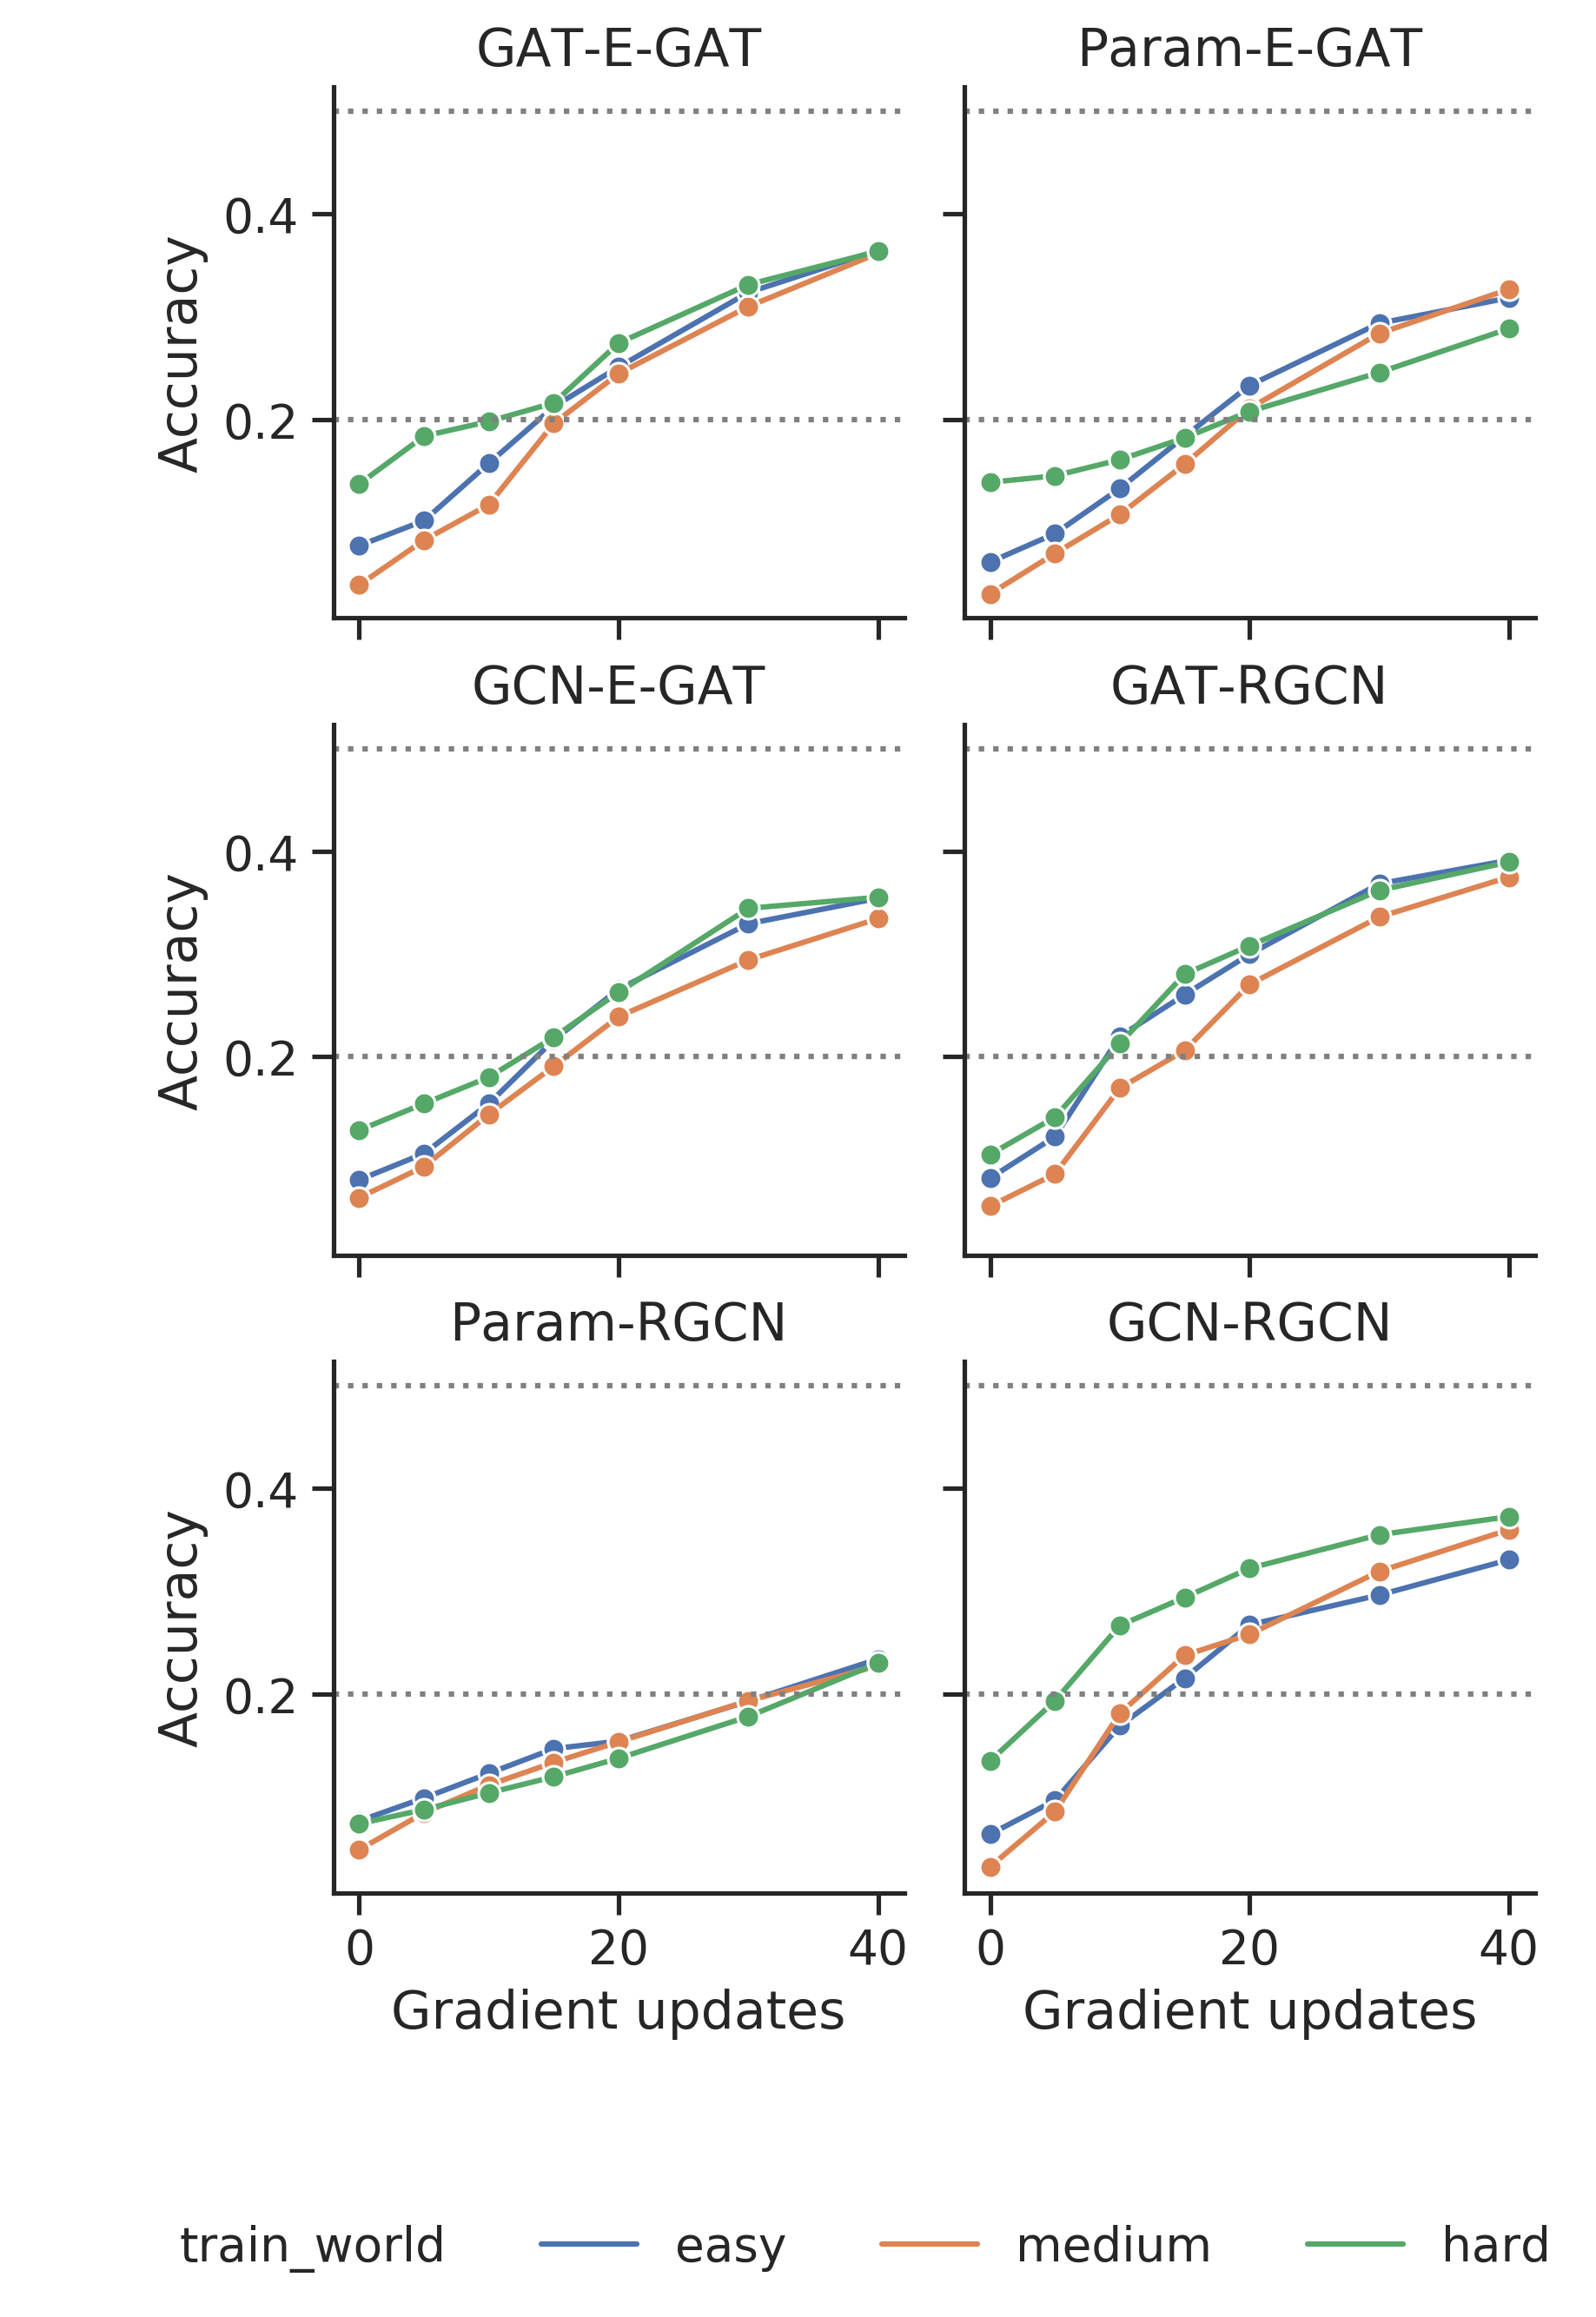

In [67]:
# g = sns.FacetGrid(ml_diff, col="train_world", row="test_world",margin_titles=True, col_order=['easy','medium','hard'])
g = sns.FacetGrid(ml_diff, col="model", margin_titles=True, col_wrap=2)
g.map(sns.lineplot, "k", "accuracy","train_world", ci=None, marker='o')
g.map(plt.axhline, y=.5, ls=":", c=".5")
g.map(plt.axhline, y=.2, ls=":", c=".5")
[plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_ylabels("Accuracy")
g.set_xlabels("Gradient updates")
g.add_legend(bbox_to_anchor=(0.0,0), loc="lower left",bbox_transform=g.fig.transFigure, ncol=4)
plt.subplots_adjust(bottom=0.18)
g.savefig("../plots/novel_multitask_difficulty_k_shot.pdf")

## Continual Learning with Curriculum

In [58]:
df_1 = pd.read_csv('../scripts/multitask_seq_curr_k0eval_results.csv')
df_2 = pd.read_csv('../scripts/multitask_seq_comp_curr_k0eval_results.csv')
df_3 = pd.read_csv('../scripts/multitask_seq_rep_curr_k0eval_results.csv')

In [59]:
model = []
for i,row in df_1.iterrows():
    model.append(row['rep_fn'] + "-" + row['comp_fn'])
df_1['model'] = model

In [60]:
world_order = 'rule_34,rule_46,rule_20,rule_48,rule_37,rule_19,rule_35,rule_31,rule_38,rule_9,rule_33,rule_24,rule_36,rule_27,rule_18,rule_47,rule_32,rule_39,rule_49,rule_10,rule_12,rule_50,rule_8,rule_21,rule_22,rule_4,rule_45,rule_7,rule_41,rule_28,rule_40,rule_44,rule_43,rule_26,rule_6,rule_5,rule_11,rule_23,rule_0,rule_15,rule_42,rule_3,rule_1,rule_29,rule_25,rule_14,rule_13,rule_30,rule_2,rule_16,rule_17'.split(',')

In [61]:
df_1['current_world_id'] = df_1.current_world.apply(lambda x: world_order.index(x))

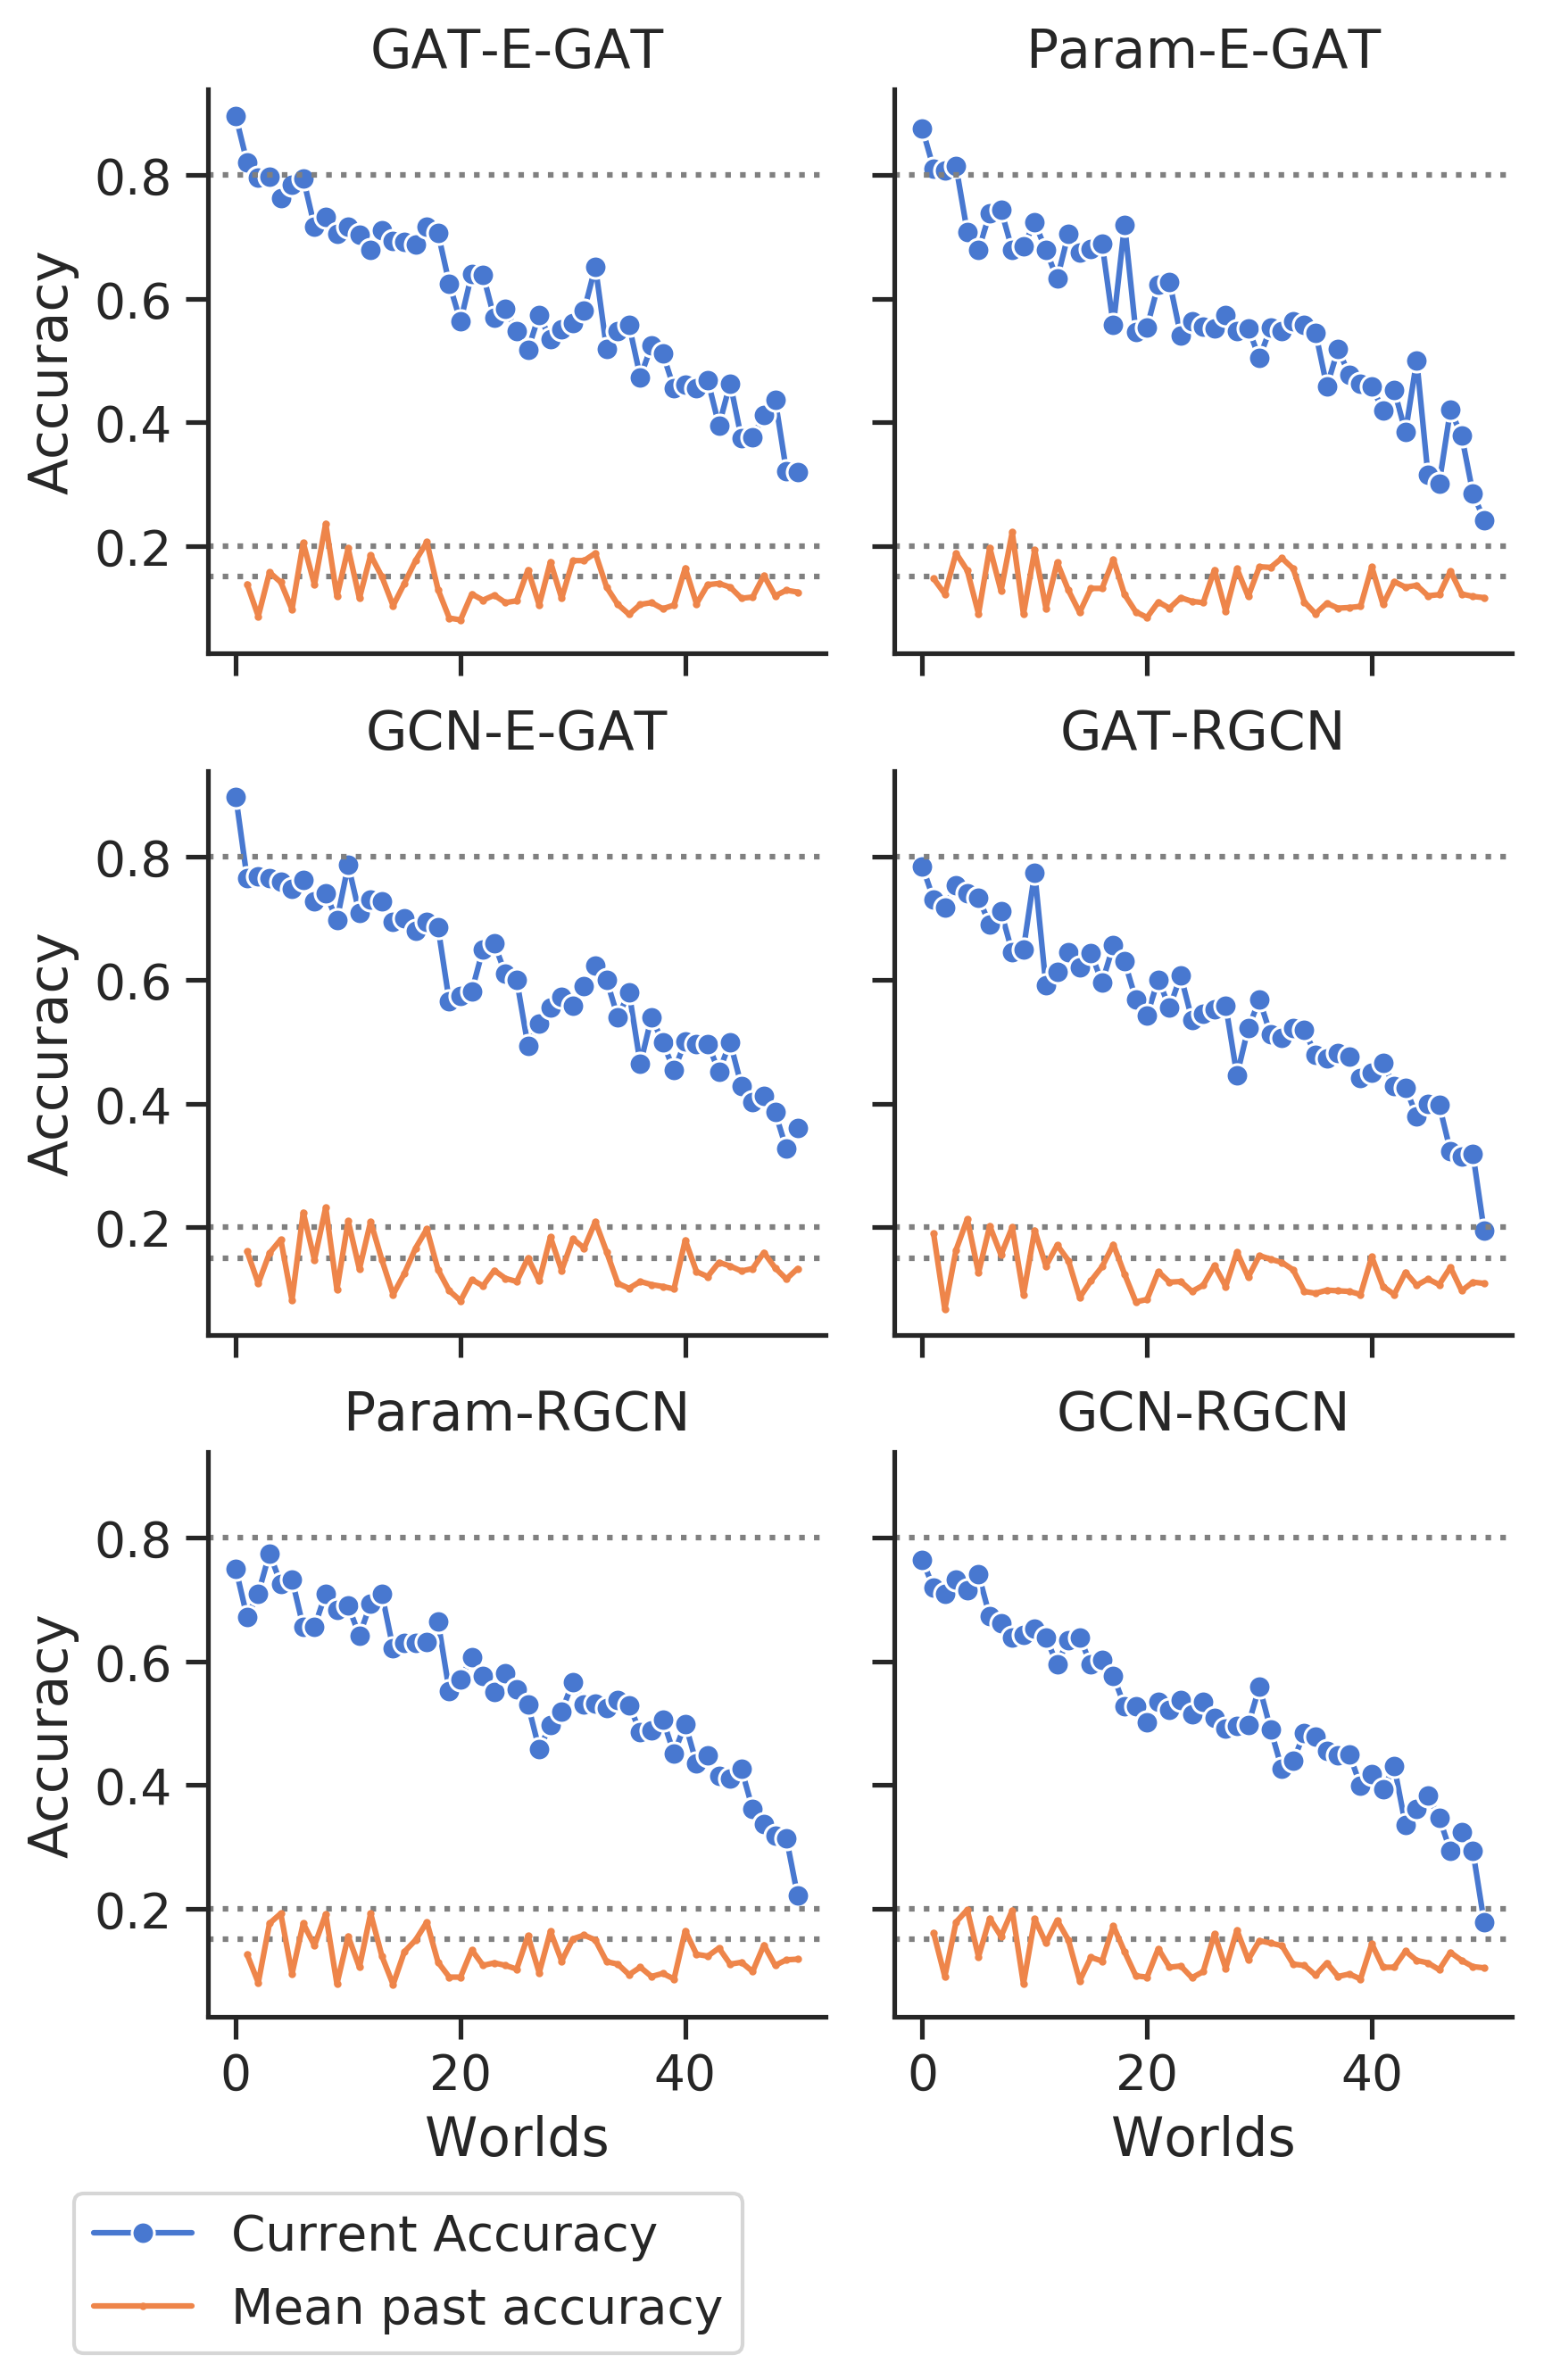

In [62]:
g = sns.FacetGrid(df_1, col="model", col_wrap=2, hue_order=model_order)
g.map(sns.lineplot, 'current_world_id', 'accuracy', marker='o', color=dark_colors[0], label="Current Accuracy")
g.map(plt.axhline, y=.8, ls=":", c=".5")
g.map(plt.axhline, y=.2, ls=":", c=".5")
g.map(plt.axhline, y=.15, ls=":", c=".5")
g.map(plt.plot, 'current_world_id', 'past_accuracy', marker='o', color=dark_colors[1], markersize=1, label="Mean past accuracy")
x = [plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_ylabels("Accuracy")
g.set_xlabels("Worlds")
plt.legend(bbox_to_anchor=(0.05,0), loc="lower left",bbox_transform=g.fig.transFigure, ncol=1)
plt.subplots_adjust(bottom=0.15)
g.savefig("../plots/continual_curr.pdf")

In [63]:
df_1['past_acc_comp'] = df_2['past_accuracy']
df_1['past_acc_rep'] = df_3['past_accuracy']

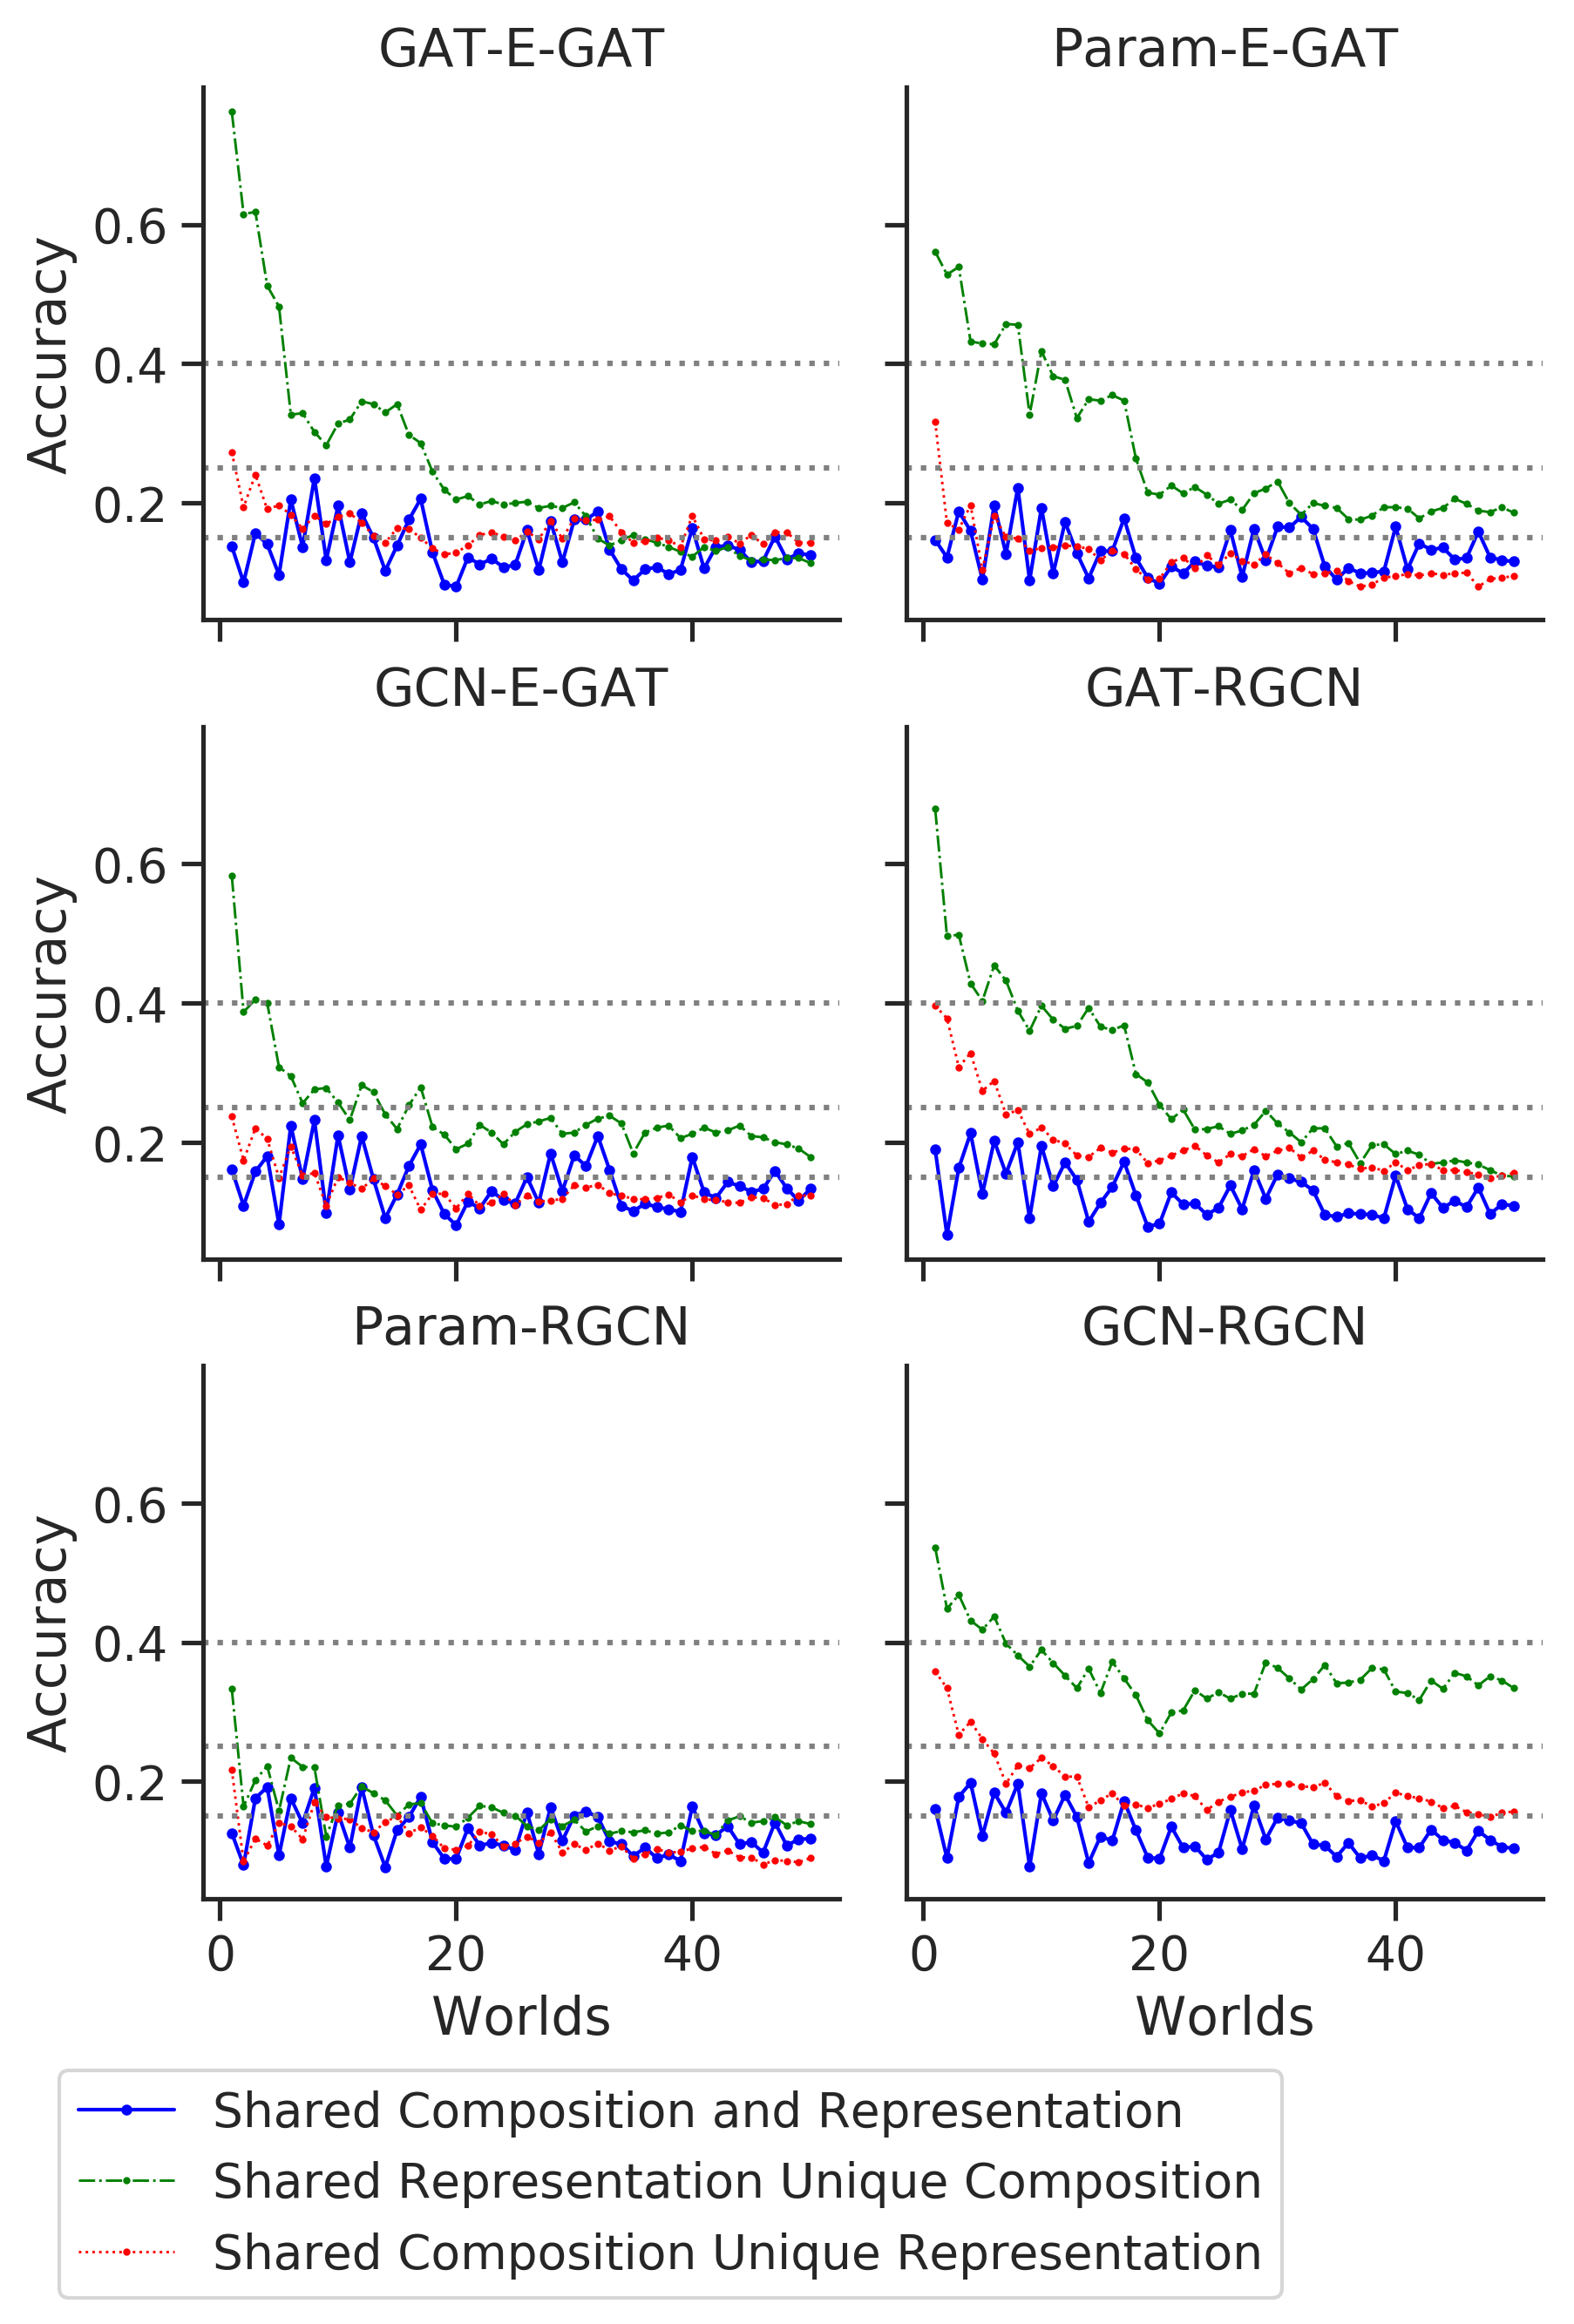

In [64]:
g = sns.FacetGrid(df_1, col="model", col_wrap=2, margin_titles=True)
#g.map(sns.lineplot, 'current_world_id', 'accuracy', marker='o')
# g.map(plt.axhline, y=.8, ls=":", c=".5")
# g.map(plt.axhline, y=.2, ls=":", c=".5")
# g.map(plt.axhline, y=.15, ls=":", c=".5")
g.map(plt.plot, 'current_world_id', 'past_accuracy', marker='o', linewidth=1, markersize=2, color="blue",label="Shared Composition and Representation")
g.map(plt.plot, 'current_world_id', 'past_acc_comp', marker='.', linewidth=0.7, markersize=2, linestyle="-.", color="green", label="Shared Representation Unique Composition")
g.map(plt.plot, 'current_world_id', 'past_acc_rep', marker='.', linewidth=0.7, markersize=2, linestyle=":", color="red", label="Shared Composition Unique Representation")
g.map(plt.axhline, y=.4, ls=":", c=".5")
g.map(plt.axhline, y=.25, ls=":", c=".5")
g.map(plt.axhline, y=.15, ls=":", c=".5")
x = [plt.setp(ax.texts, text="") for ax in g.axes.flat]
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_ylabels("Accuracy")
g.set_xlabels("Worlds")
#g.add_legend(loc="lower left")
plt.legend(bbox_to_anchor=(0.0,0), loc="lower left",bbox_transform=g.fig.transFigure, ncol=1)
plt.subplots_adjust(bottom=0.18)
g.savefig("../plots/continual_curr_all.pdf")